# PROJECT II - CUSTOMER SEGMENTATION
### AUTHOR: GIULIO MARTINI
### INSTRUCTOR: DR. RYAN WHITE
### COURSE: INTRO TO MACHINE LEARNING MTH 4224

## The project
    The importance of customer segmentation is unparalleled in any type of industry. It regards dividing current customers into different groups based on features that are relevant in marketing, such as age, gender or wealth-level. By grouping customers together, a company may decide to change their ad campaigns or products/services all together, to impact more the chosen 'customer segment'. Dividing customers based on a single feature can be easily done, however, people are often more correctly categorized based on a number of features all together, and how these characteristics relate to each other. In this project, a database contaigning customers of various banks will be segmented using different clustering algorithms. The project will be divided into three parts.

### Part I

    Durign the first part, the datapoints will be clustered based solely on the numerical columns, such as 'Age', 'Credit amount' and 'Duration'. This will provide insight on how these three features are linked together and will give a first, approximative segmentation of customers in the three categories. 

### Methods used during Part I
* KMeans 
* Affinity propagation

### Part II

    The second part will see the conversion of the categorical columns to numerical ones, so that they may be analyzed as well.  Kmeans will be once again used and the difference between having the extra columns, or not, will be observed. Density based algorithms will be used to determine whether the are clusters inside of clusters, for further analysis.

### Methods used during Part II
* KMeans
* Agglomerative clustering
* DBScan 
* Meanshift

### Part III

    The third, and last, explores the predictive side of these algorithms. Random Forest will be used to determine which of these clustering algorithms is the most predictable. The three algorithms to be analyzed will be Agglomerative clustering, DBScan and Kmeans. 

### Methods used during part III
* Random Forest

## The database
    The provided database contains customer information regarding various banks in the berlinese area; it possesses 1000 rows and 10 columns, all classifiying the customer in different categories, except for the first one, used as an identification feature.

In [1]:
# @author: Giulio Martini
# @date: 26/04/2022
# @version: 1.0.0
# @name: Customer_Segmentation_using_Clusters



#Each of these libraries have one or more methods essential to the functioning of the program.
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
import scipy.stats as stats
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#Eliminates the various warnings which would otherwise fill the output
warnings.filterwarnings("ignore")

#'scatterPlots' is a function which produces 3 different scatterplots based on the provided database and the chosen feature to differentiate
# the scattered point. Each scatterplot is a different binary combination of Age, Credit amount and Duration. 'df' is the database, 'a' is the feature
# and 'b' is simply the coloring scheme: pastel.
def scatterPlots(df, a=None, b='pastel'):
    fig, (axys1, axys2, axys3) = plt.subplots(3,1, figsize=(10,10))
    sb.scatterplot(x="Age",y="Duration", hue=a, palette=b, data=df, ax=axys3)
    sb.scatterplot(x="Age",y="Credit amount", hue=a, palette=b, data=df, ax=axys2)
    sb.scatterplot(x="Credit amount",y="Duration", hue=a, palette=b, data=df, ax=axys1)
    plt.tight_layout()

#'createBoxes' is a function which creates a box plot pertaining to the different features provided: a and b will be on the axys', while c 
# will be the differentiator. 'r' is simply the rotation of the names of c under the boxes.
def createBoxes(a,b,c,r=60):
    fig, axys = plt.subplots(figsize=(10,6))
    box = sb.boxplot(x=a,y=b, hue=c, data=df)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()
#'distributionPlots' is a function wich creates varies histograms based on the distribution of values: it creates one for each of the central features, Age, Credit amount and Duraution.
def distributionPlots(df):
    fig, (axys1, axys2, axys3) = plt.subplots(3,1, figsize=(8,8))
    sb.distplot(df["Age"], ax=axys1)
    sb.distplot(df["Credit amount"], ax=axys2)
    sb.distplot(df["Duration"], ax=axys3)
    plt.tight_layout()

#The csv file is read and placed in a dataframe. The first column, which only represents IDs is dropped, as it is not a characteristic of a datapoint and tells us nothing about it.
df = pd.read_csv(r'C:\Users\marti\OneDrive\Desktop\project2\german_credit_data.csv')
df.drop(df.columns[0], inplace=True, axis=1)



# THE FIRST PART 

# Visualizations

    Before expoloring it, one must visualize and understand the data. During all parts a brief introduction will be made where the different plots will be used to correctly visualize and interpret the data.

The number of unique values is:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


The number of each unique values in a non-numerical column is:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


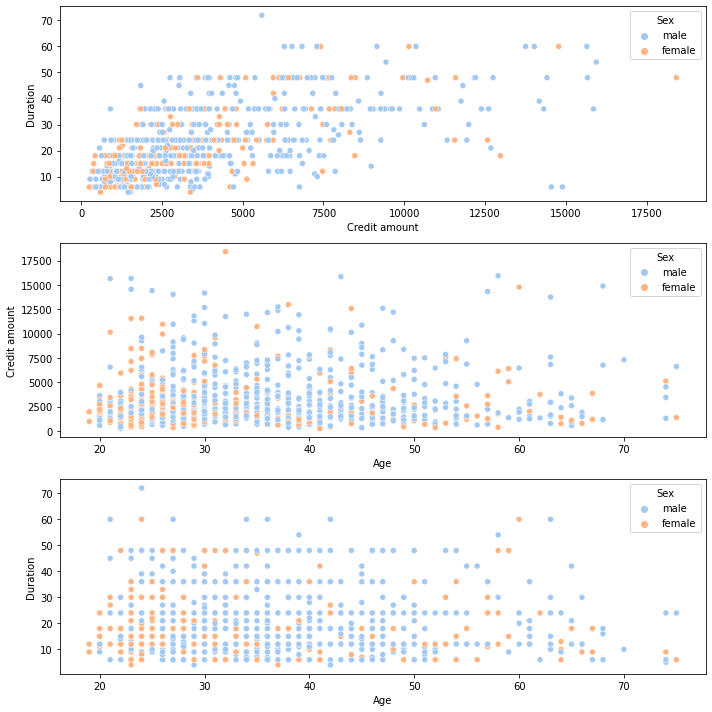

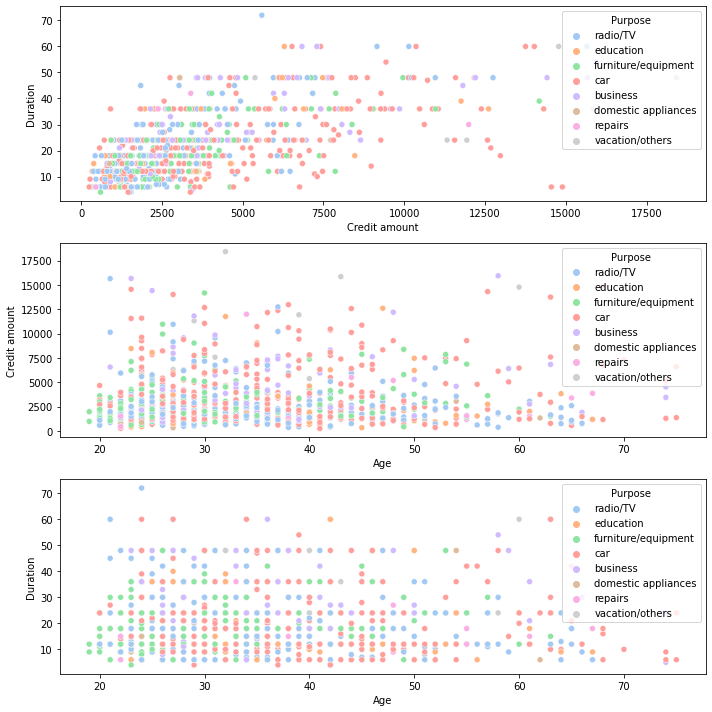

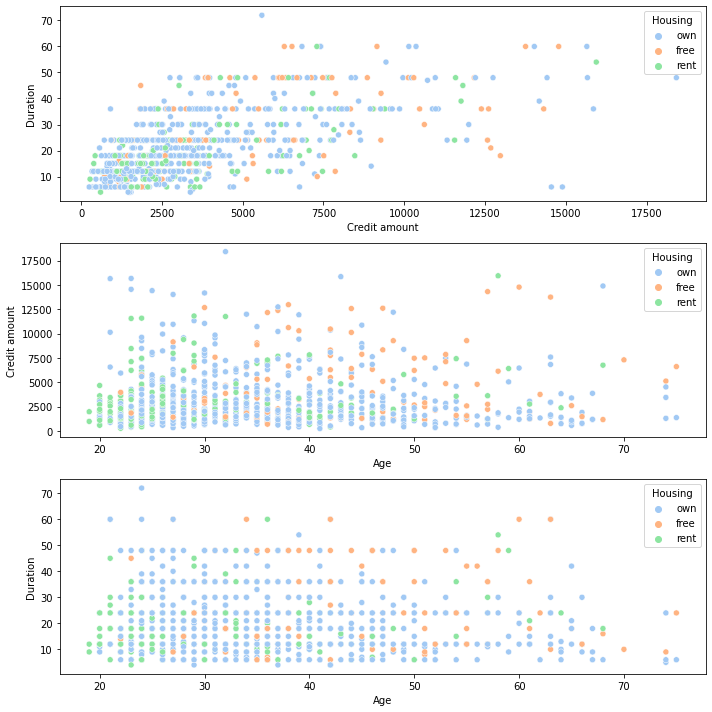

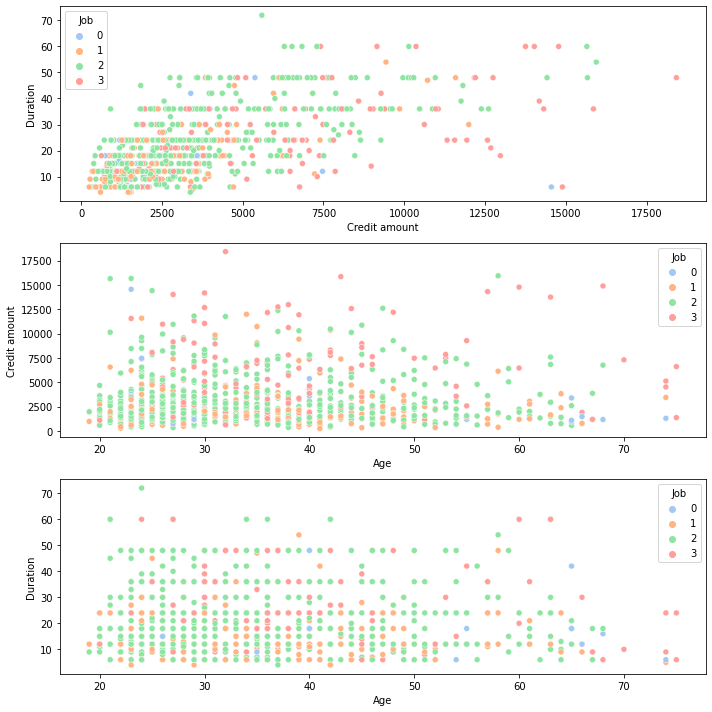

In [2]:
#The number of unique variables is given, along with each unique denomination in the categorical features.
uniqueVariables = df.nunique()
print('The number of unique values is:\n{}'.format(uniqueVariables))
print('\n')
print("The number of each unique values in a non-numerical column is:")
for unique in df.select_dtypes(include=[object]):
    print(unique,":", df[unique].unique())

#scatterPlots are created for different categorical features in order to better visualize the data.
scatterPlots(df, a  = "Sex")
scatterPlots(df, a = 'Purpose')
scatterPlots(df, a = 'Housing')
scatterPlots(df, a = 'Job')


### Plot interpreation

    As stated before, Part I focuses on the numerical features of the database, which include 'Age', 'Duration' and 'Credit amount'. Initially, each combination of the three is analyzed, through scatter plots, with three categorical features ('Sex', 'Purpose' and 'Housing'). This produces 9 different scatter plots.

    From what can be seen by the initial three plots, it seems that there is no clear difference between men and women, when it comes to duration and amount given. From the other two plots, it shows that women tend to be younger than men when taking out a loan, and that there are a lot more men than women in the database.

    From the second set of plots, it can be seen that 'education', 'car' and 'business' dominate the left half of the given amounts. Most people spend on these, which is understandable. On the same plot, 'furniture' and 'radio/TV' are on the lower end of the spectrum, which makes sense, because they cost less. Most of the loans seem to be given to ages 25 to 35, with only a few outliers at more than 70 years old. Most young people in the database, tend to buy furniture or Tvs with the grants, while middle-aged folks use their money for cars. Lastly, the credits that have the biggest durations are business, car and, radio/TV. The first two are understandable, the second one not so much, however, when taken into account that radio/TV is mostly a feature of younger people, then it can be assumed that the grant is also being used to buy furniture, and the categories might have been mistaken.

    From the last set of plots, it can be seen that a vast number of people owns their residence, and the ones that take the most credit are people who have free housing. This is understandable, as they do not need to pay bills or rent, and can afford to pay it back quicker, which, according, to the third and most graph, they averagely do. People who rent houses are in their earlier twenties, which makes sense. They are also the ones that pay it back the quickest and have the lowest amount. Speaking from experience, a University student dorm will cost far less than an entire house by one's self. 

(0.6249841983009835, 1.8628512880465833e-109)


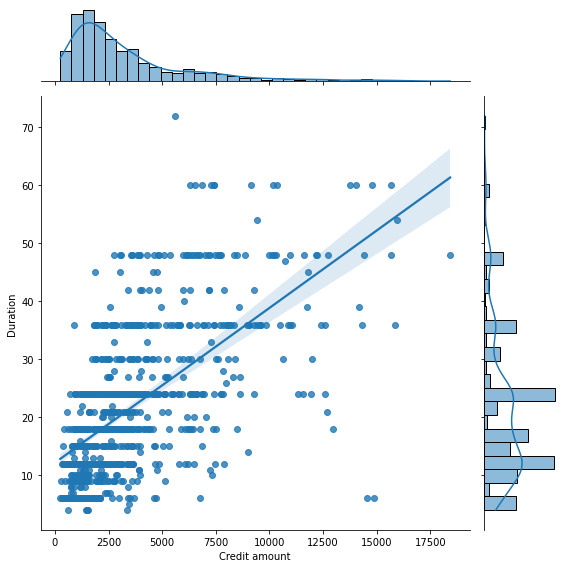

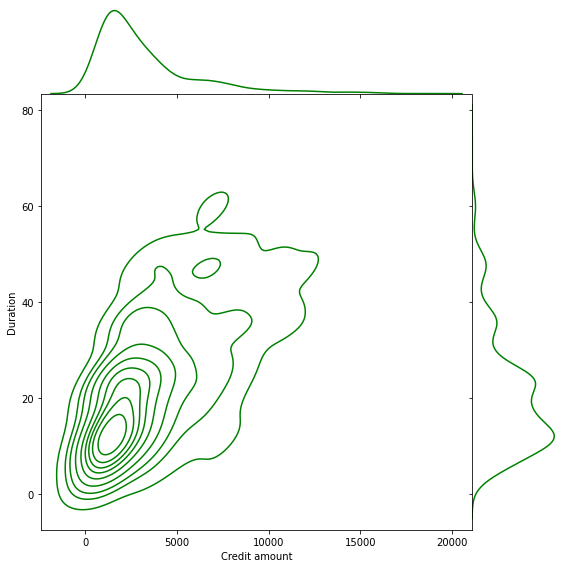

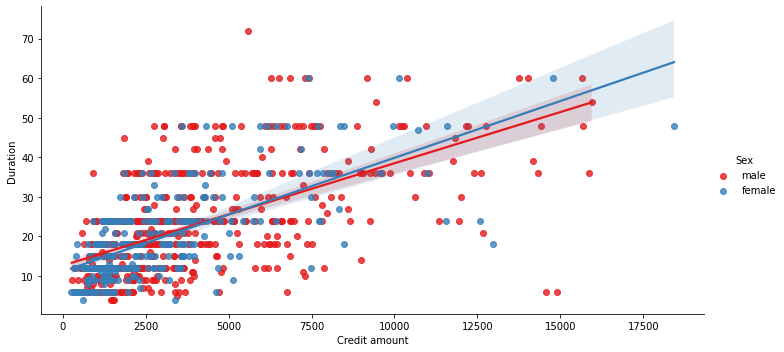

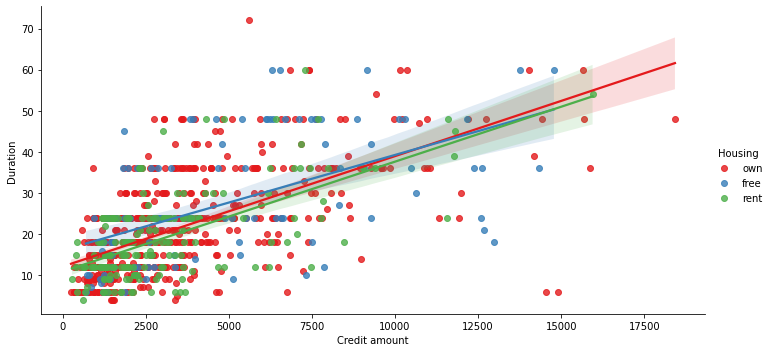

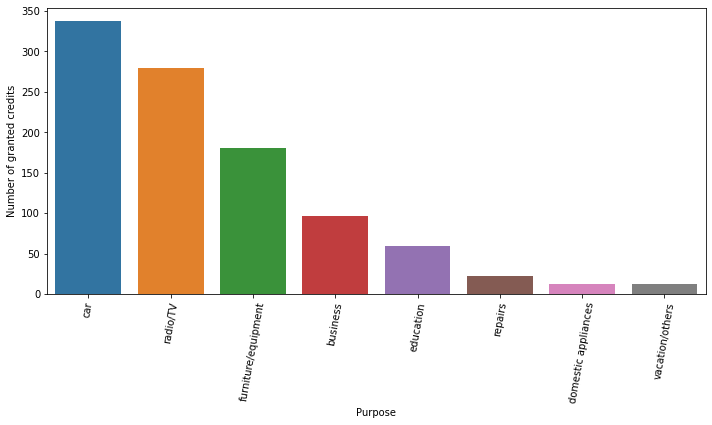

In [3]:
import scipy.stats as stats


#Two jointplots are created, both with univariable and bivariable plot. 
#The pearson value is also printed to show the correlation between the features.
line1 = sb.jointplot(x="Credit amount",y="Duration", data=df, kind="reg", height=8)
print(stats.pearsonr(df['Credit amount'], df['Duration']))
plt.show()
#The second jointplot is the same as the first, albeit with a different plotting scheme. Som readers may enjoy more this format, hence the reason
#for why it was added.
sb.jointplot("Credit amount","Duration", data=df, kind="kde", space=0, color="g",  height=8)

plt.show()
#More linear regression plots are graphed, equipped with a line for better understanding.
sb.lmplot(x="Credit amount",y="Duration", hue="Sex", data=df, palette="Set1", aspect=2)
plt.show()

sb.lmplot(x="Credit amount",y="Duration", hue="Housing", data=df, palette="Set1", aspect=2)
plt.show()


#The different occurences inside the database are counted each time they appear, in order to make a bar graph for the feature 'Purpose'.ù
#Each time that specific Purpose appears, the bar graph gets higher.
nCreds = df.groupby("Purpose")["Age"].count().rename("Count").reset_index()
nCreds.sort_values(by=["Count"], ascending=False, inplace=True)
plt.figure(figsize=(10,6))

bGraph = sb.barplot(x="Purpose",y="Count",data=nCreds)
bGraph.set_xticklabels(bGraph.get_xticklabels(), rotation=80)

plt.ylabel("Number of granted credits")
plt.tight_layout()

### Plot interpretation

    The next set of visualizations is a set of five different graphs. These graphs regard the global dataset and how different features relate to each other on a more universal scale, unlike the previous set of visualizations that described only double or triple relationships given two features. 

    The first and fourth plot are the same, but with different aesthetics. Some users prefer one, and some the other, so for conveniency both have been added. The are three plots in one graph. The center one is a scatter plot of Credit Amount vs Duration, showing that most credit loans are of little value and are thus returned quite early. In the first graph, a linear correlation line is also plotted; given that its slope seems to be close to 1, it can be assumed that there is a linear correlation between 'Duration' and 'Credit amount': the more money grannted, the more it takes to give it back. Makes sense. The graphs are also equipped with two univariate plots on each side of the canvas. On the right side, there is the distribution of durations, while on top is the distribution of credit amount. The program also outputs the Pearson value and a double tailed p-score. The Pearson value oscillates from -1 to 1 to determine linear dependency. In this case, it is 0.61, a good enough value to determine that, as aforementioned, there is a linear relationship between the two. The two tailed p score is extremely low, confirming all of the assumptions.

    The second and third graph are scatter plots much like in the previous sections, although linear correlations lines are provided. These lines are plotted in order to see if one type of housing or one of the genders is significantly more important or different from the others, however all the lines are equal, with only 'Owned' being more prevalent then the others in the 'Housing' section.

    The last plot is a bar graph; it shows the distributions of all the different purposes and, it can be seen that 'car' and 'Radio/TV' dominate the database. If checked on the database, the first mention of 'Car' comes as the fourth official classificaition, while 'Radio/TV' comes in fifth. 

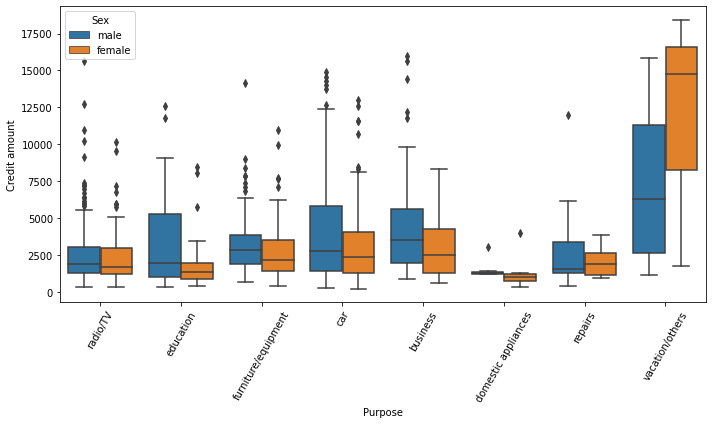

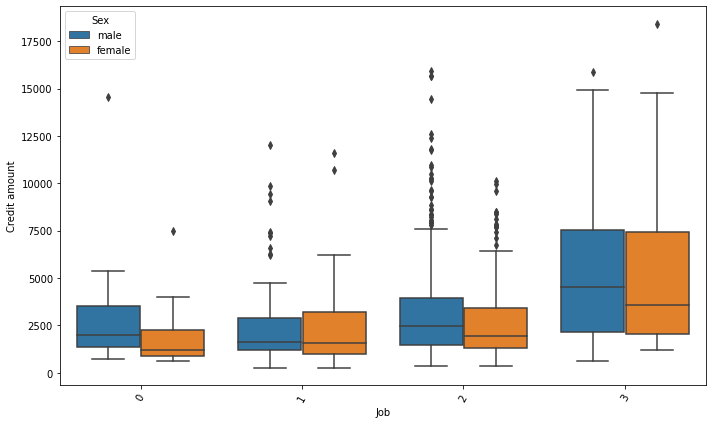

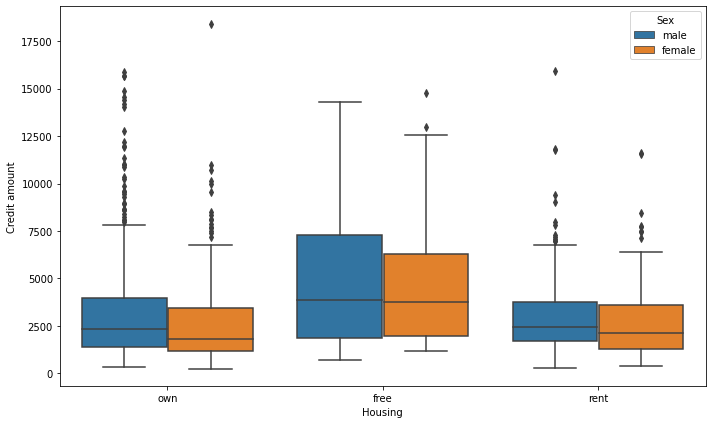

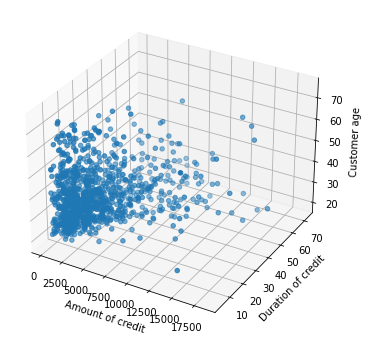

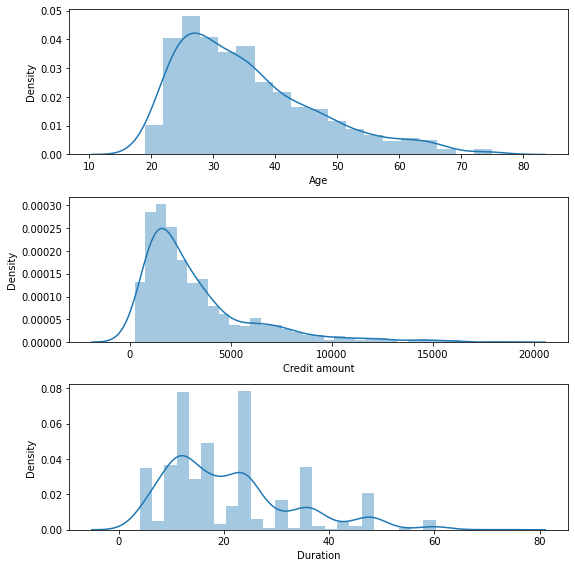

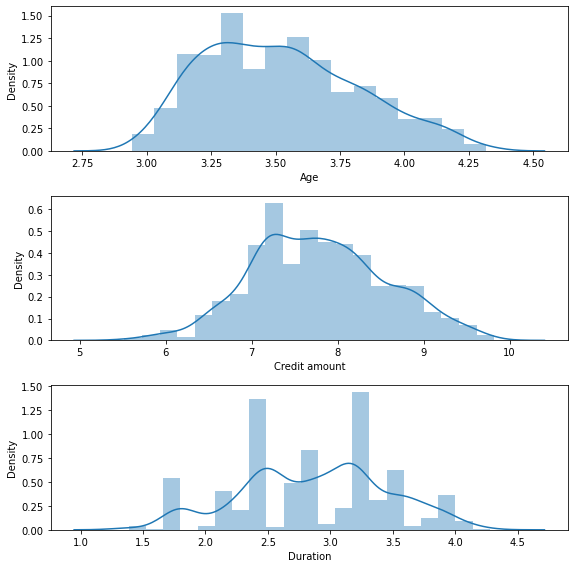

In [4]:
#The various box plots are created, producing interesting results.
createBoxes("Purpose","Credit amount","Sex")
createBoxes("Job","Credit amount","Sex")
createBoxes("Housing","Credit amount","Sex",r=0)

#A 3d plot is provided to show where the data lies, indicatively.
fig = plt.figure(figsize=(10,6))
axys = fig.add_subplot(111, projection='3d')
axys.scatter(df["Credit amount"], df["Duration"], df["Age"])
axys.set_xlabel("Amount of credit")
axys.set_ylabel("Duration of credit")
axys.set_zlabel("Customer age")

columnsSelected = ["Age","Credit amount", "Duration"]
dataClustered = df.loc[:,columnsSelected]
#distributionPlots is used to view the data before scaling, and after scaling. Log scaling is done to remove left skew.
distributionPlots(dataClustered)
logCluster = np.log(dataClustered)
distributionPlots(logCluster)
scaler = StandardScaler()
scaledCluster = scaler.fit_transform(logCluster)
rangeOfClusters = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

### Plot intepretation

    The last set of graphs is a mix of singular variables and multivariate graphs. After consulting these graphs, the user will be much more aware of the data they are handling. 

    The first three graphs are box graphs, relating the 'Purpose', 'Job' and 'Housing' feature to how many credits each person is taking, while differentiating between men and women. Do any of these matter when taking out loans? From the box graphs, there is no indication that men and women are different in such a regard, aside from the fact that women tend to have a higher mean in each category. There are probably a few outliers representing women that take out gigantic individual grants. Feature wise, the biggest singular loans are given for vacations, while the smallest are for domestic appliances. This makes sense for the latter, but not for the former. This is most likely the work of very rich outliers. Furthermore, the jobs that grant people to take out larger credits are ones that make you 'Rich', and so a bank will be more inclined to provide credits. Lastly, in the housing feature, the 'Free' housing category tends to take out larger sums. This makes sense, as one does not have the liability of bills or repairs, and the banks will view so in a positive way.

    The second fourth provided graph is a 3D scatter plot; it shows the relationship with Credit amount and Duration of such credit with the age of the customer, the three main features that are being analysed. Taking into the account the ages of the customers, it can be noted that most elderly customers take credits with less than 30 years duration (sadly predictable).

    The subsequent six plots analyse the density of singular features before and after going through logarithmic scaling, a process needed to remove the skewness. All the distributions are right skewed, so logarithmic scaling makes them more centered. This helps in better visualizing the amounts of each feature. Logarithmic scaling only works for right-skewness, left skewness is corrected  with power scaling. Log scaling symmetrizes right skewness, while power scalign symmetrizes left skewness.

# Main takebacks from explorative analysis:
* There are more men than women, and the women tend to be younger.
* Most people own their residence.
* Most people take out loans for their car, business and Radio/TV
* Radio/TV could be included in 'Furniture'; a TV is often the most expensive piece of furniture and that might be why that category is mostly absent.
* Credit amount and duration have a linear correlation; when one rises, so does the other.
* There is no significant difference between men and women.
* There is no significant difference between housing types (the 'Free' category takes the lead in 'Credit amount', although by a minuscule margin).
* The biggest individual loans are taken out for vacations.
* Individually bigger credits are taken out by people with either well-paying jobs or with free housing.
* Older people tend to have a smaller duration for each loan.
* Women have higher individual loan means than men.

# The clustering begins


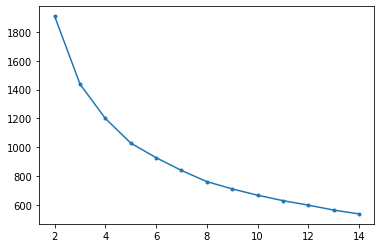

In [5]:
#The first clustering algorithm is initialized, and the inertia for KMeans is calculated and plotted.  Based on this data,
#the number of clusters will be chosen, while also visualizing the range of available clusters.
for cluster in rangeOfClusters:
    kmeans = KMeans(n_clusters=cluster, random_state=0).fit(scaledCluster)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(rangeOfClusters,inertias, marker='.')

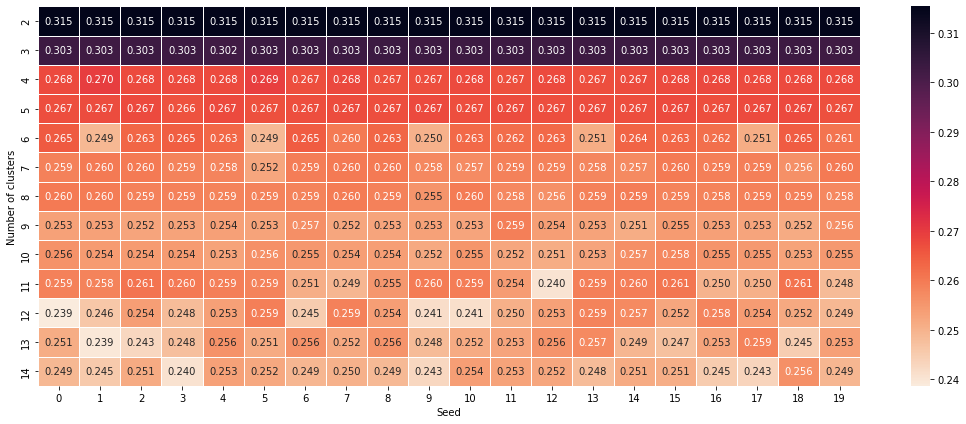

In [6]:
#The three following variables are used in the forming of a silhouette score heatmap.
rangeOfClusters = range(2,15)
random_range = range(0,20)
results =[]
#The following for loop records the average silhouette scoore based on clusters and seeds, in a conventiently sized array called
#'results'.
for c in rangeOfClusters:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(scaledCluster)
        silhouette_avg = silhouette_score(scaledCluster, cluster_labels)
        results.append([c,r,silhouette_avg])
#pivot_km is the silhouette score table, which is then printed in the form of a heatmap 
result = pd.DataFrame(results, columns=["Number of clusters","Seed","Silhouette score"])
pivot_km = pd.pivot_table(result, index="Number of clusters", columns="Seed",values="Silhouette score")

plt.figure(figsize=(15,6))
sb.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sb.cm.rocket_r)
plt.tight_layout()

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.30255813750380023


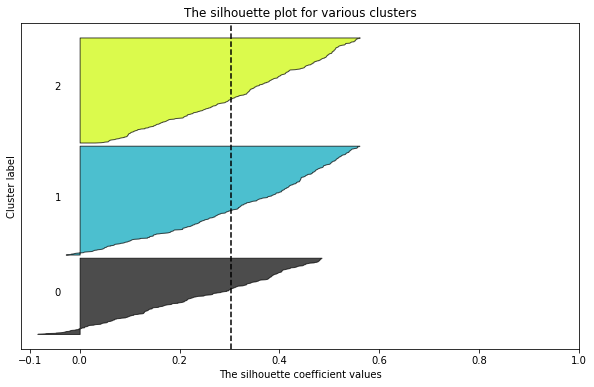

In [7]:
#A number of clusters equal to three is chosen for further analysis on the accuracy of the clusters
kmeansSel = KMeans(n_clusters=3, random_state=1).fit(scaledCluster)
labels = pd.DataFrame(kmeansSel.labels_)
clustered_data = dataClustered.assign(Cluster=labels)
clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(scaledCluster)
silhouette_avg = silhouette_score(scaledCluster, cluster_labels)
print("For three clusters and seed =", r,  "\nThe average silhouette score is found to be:", silhouette_avg)

#For each sample, the silhouette score is calculated.
#This value will then be used for visualization and more plots.
sample_silhouette_values = silhouette_samples(scaledCluster, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
#This for loop computes new values  that will be used for each of the plots below. It essentually creates the new plotes 
#in an axys variable, which are then ready to be printed afterwards.
for i in range(3):
    #The silhouette scores are sorted and aggregated per cluster i
    newSilClusValue = sample_silhouette_values[cluster_labels == i]
    newSilClusValue.sort()

    size_cluster_i = newSilClusValue.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, newSilClusValue, facecolor=color, edgecolor="black", alpha=0.7)
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    
    y_lower = y_upper + 10  
#more plots.
ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster number")
#A vertical line is plotted to show the average silhouette score across all samples.
ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

## Choosing the number of clusters
    
    Firstly,an inertia graph is plotted and, as a result, it can be seen that thhe lower the number of clusters, the higher the inertia is, which means that a small number of clusters is best. 
    
    Silhouette score analysis is run and it is determined that the best number of clusters is three, with no difference for the number of seeds. The silhouette score is a quantitative measure which goes from 0  to 1, to determine the accuracy of a clustering algorithm. In this case, it is not really accurate; 31.5% is not the best result. This probably stems from the database and how poorly each category is classified. 

    The K-MEANS algorithm is then run, and the various clusters are shown below.

In [8]:
#The mean value for each of the clusters is found.
kmGroups = clustered_data.groupby(['Cluster']).mean().round(1)
kmGroups

Age  Credit amount  Duration
Cluster                               
0        48.5         1970.3      13.9
1        34.0         5665.4      32.2
2        27.7         1736.3      14.3

In [9]:
#The max value for each of the clusters is found, along with their extremities.

kmGroupsMax = clustered_data.groupby(['Cluster']).max().round(1)
kmGroupsMaxAge = kmGroupsMax['Age']
kmGroupsMaxCreditAmount = kmGroupsMax['Credit amount']
kmGroupsMaxDuration = kmGroupsMax['Duration']
kmGroupsMax

Age  Credit amount  Duration
Cluster                              
0         75          14896        36
1         65          18424        72
2         36          14555        36

In [10]:
#The max value for each of the clusters is found, along with their extremities.
kmGroupsMin = clustered_data.groupby(['Cluster']).min().round(1)
kmGroupsMinAge = kmGroupsMin['Age']
kmGroupsMinCreditAmount = kmGroupsMin['Credit amount']
kmGroupsMinDuration = kmGroupsMin['Duration']
kmGroupsMin

Age  Credit amount  Duration
Cluster                              
0         36            250         4
1         20           1819        11
2         19            276         4

0.30255813750380023


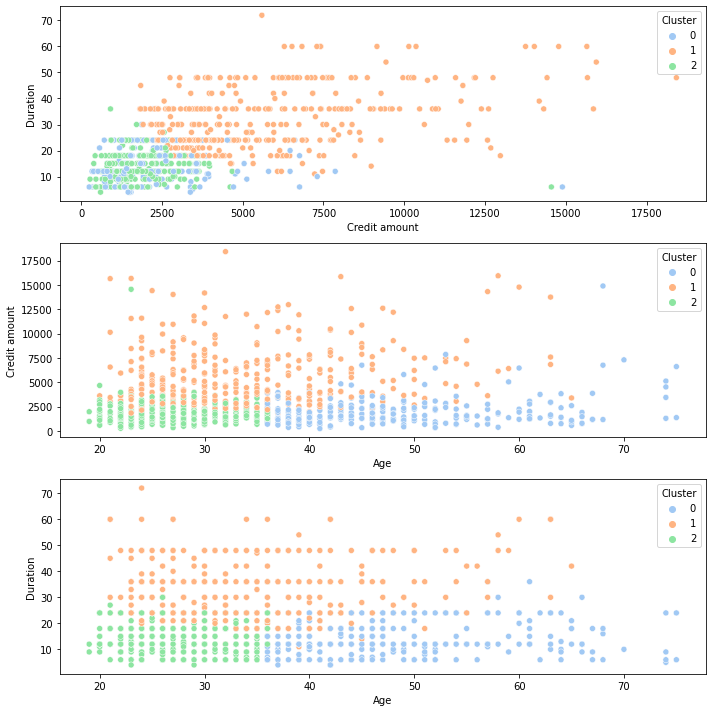

In [11]:
#The three dfferent clusters are then visualized.
scatterPlots(clustered_data, 'Cluster')

## Plot intepretation

    These are the first plots of a clustering algorithm: KMeans. What can be seen? 

    For Credit amount vs Duration, clusters 0 and 2 are virtually the same, with 0 being slightly more left skewed. Their means should be almost the same for both features, with Cluster 1 having a higher mean for both.

    For Age vs Credit amount and Age vs Duration, the three clusters are well defined. 2 is tends to the left, having a low mean on both features and the smallest variance among the clusters. 0 tends to the right, having a high mean on Age and low  mean on Credit amount or Duration. 1 sits atop both of them, having an Age mean that sits close to where 0 and 2 divide, and having a high Duration and Credit amount mean.

## Cluster interpretation
* Cluster 0 --> Older customers that don't take out very high credits, excepts for some outliers. They tend to give back the credits fairly soon. Many of them own their house or have free housing.
* Cluster 1 --> People of all ages that take out bigger credit amounts and take the most time to give them back. These are presumably the customers who take the loans for their cars or businesses. Most of them have higher paying jobs and some of them are outliers who spend their sums on Vacations.
* Cluster 2 --> Younger customers who take out smaller credits and give them back fairly quicky. Probably either for their education or their car, business or Radio/TV. In this category, many of them have free housing or renting.

     Age  Credit amount  Duration  Cluster
0     67           1169         6        0
1     22           5951        48        1
2     49           2096        12        0
3     45           7882        42        1
4     53           4870        24        1
..   ...            ...       ...      ...
995   31           1736        12        2
996   40           3857        30        1
997   38            804        12        0
998   23           1845        45        1
999   27           4576        45        1

[1000 rows x 4 columns]


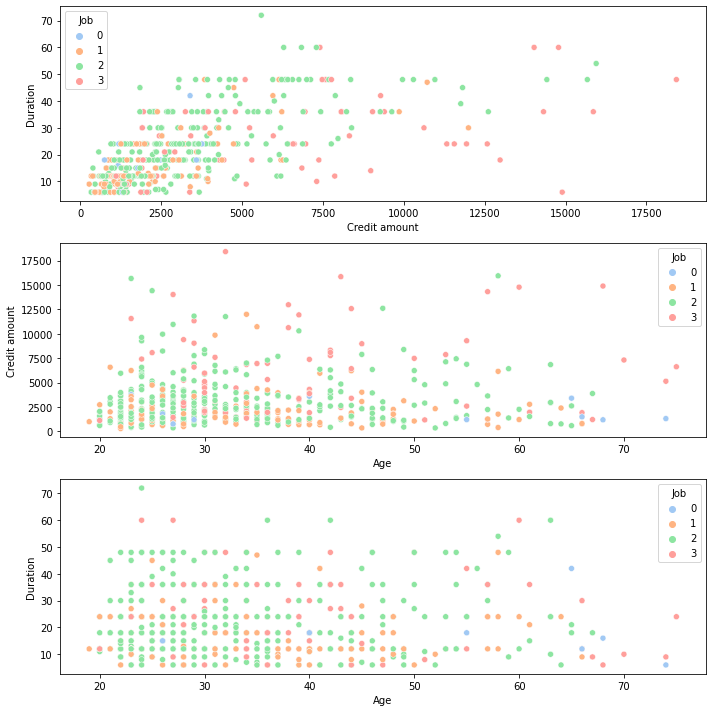

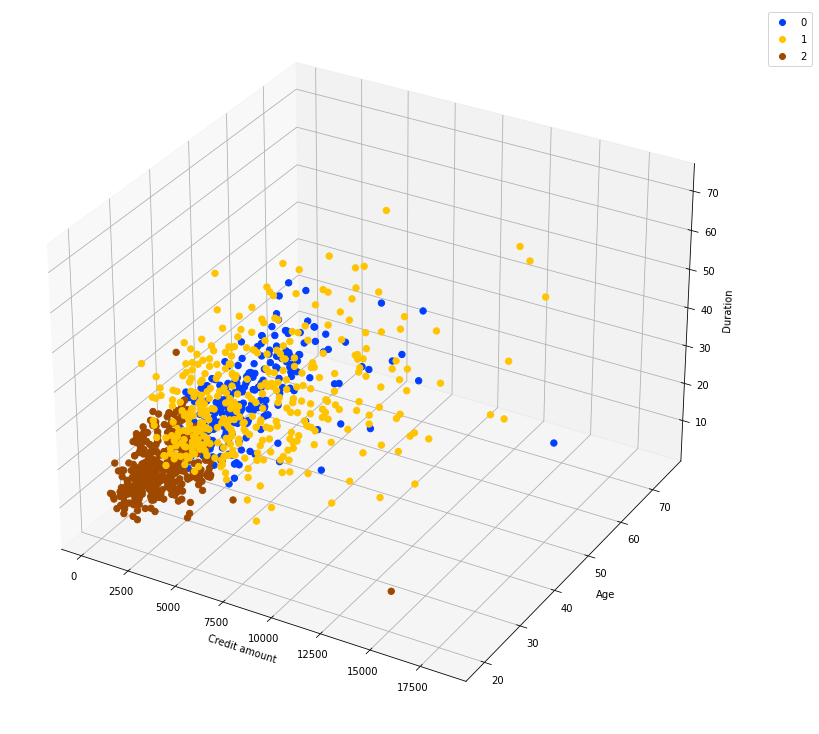

In [46]:
#A scatter plot for the 'Job' feature is created.
scatterPlots(df, a = 'Job')
#Along with a new 3d scatterplot of the clustered data.
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
print(clustered_data)
# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

sc = ax.scatter(clustered_data['Credit amount'], clustered_data['Age'], clustered_data['Duration'], s=40, c=clustered_data['Cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Age')
ax.set_zlabel('Duration')

#Legend of plot.
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

#The figure is then saved.
plt.savefig("scatter_hue", bbox_inches='tight')

    From the scatterplot, it can be observed that the wealthier customers take out loans of any range, and are usually the ones that take out the bigger ones, followed by the quite rich ones.

0.30255813750380023


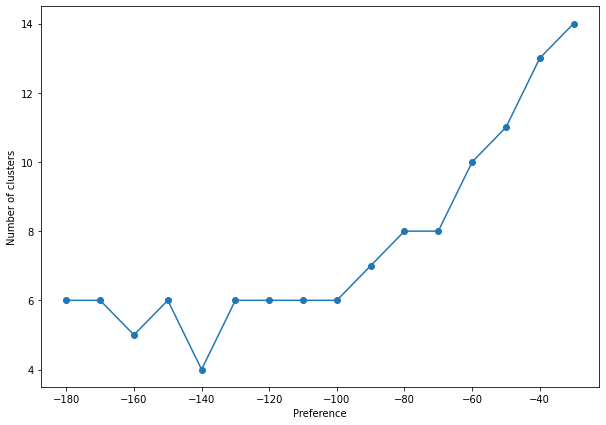

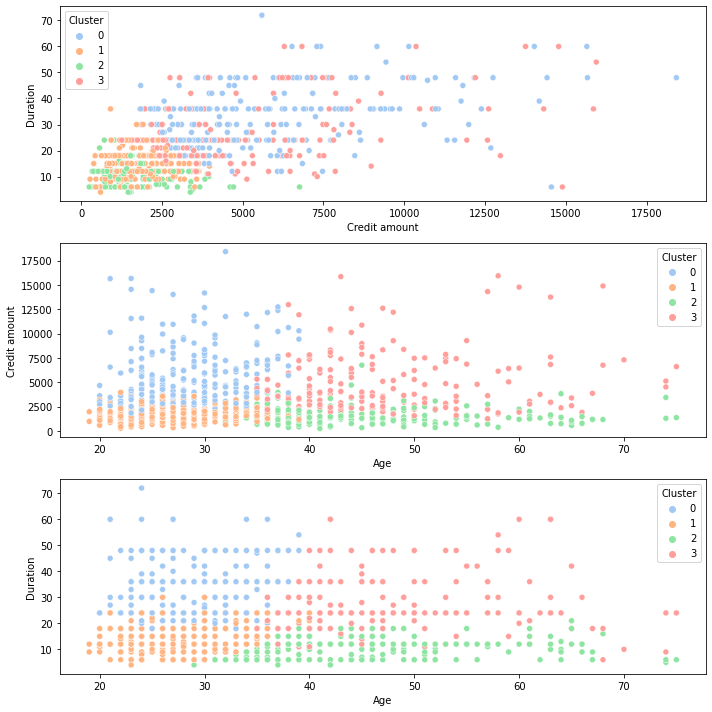

In [13]:
from sklearn.metrics import silhouette_score

preferences = np.arange(-30,-190,-10)
clusters = []
#An affinity propagation preference analysis is computed and the results are plotted.
for p in preferences:
    afProp = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(scaledCluster)
    afLabels = pd.DataFrame(afProp.labels_)
    clusters.append(len(afProp.cluster_centers_indices_))
#The 'plt' commands indicate the specifications of the plot.
plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')
silhouette_score(scaledCluster, afLabels)
print(silhouette_avg)
#Affinity propagation is complete, with a preference of -140 (5 clusters) and a damping of 0.6.
#It is also performed by fitting the data through the scaler (done previously).
afProp = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(scaledCluster)
afLabels = pd.DataFrame(afProp.labels_)
#A new column is created, specifying the clusters.
clustered_data_af = dataClustered.assign(Cluster=afLabels)
#The data is then scattered.
scatterPlots(clustered_data_af,'Cluster')



     Age  Credit amount  Duration  Cluster
0     67           1169         6        1
1     22           5951        48        3
2     49           2096        12        4
3     45           7882        42        3
4     53           4870        24        4
..   ...            ...       ...      ...
995   31           1736        12        0
996   40           3857        30        3
997   38            804        12        1
998   23           1845        45        2
999   27           4576        45        3

[1000 rows x 4 columns]


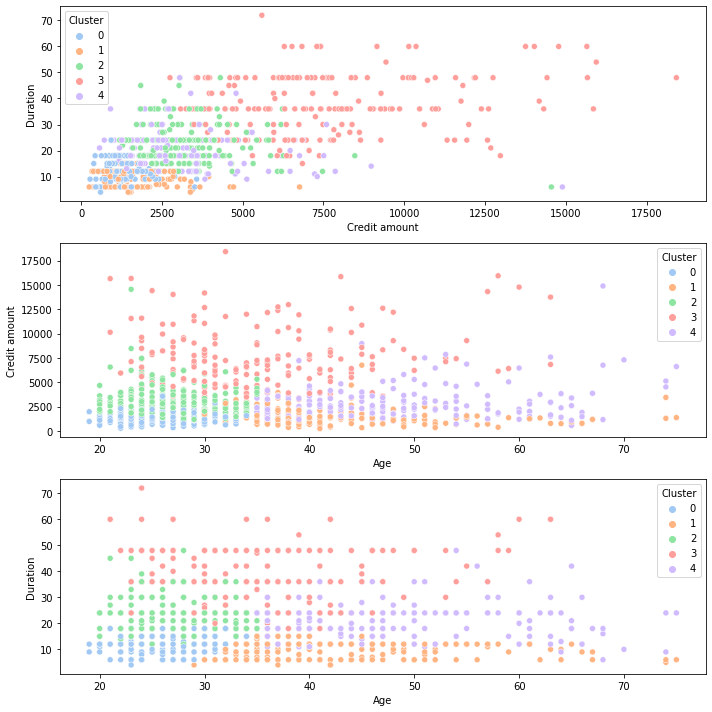

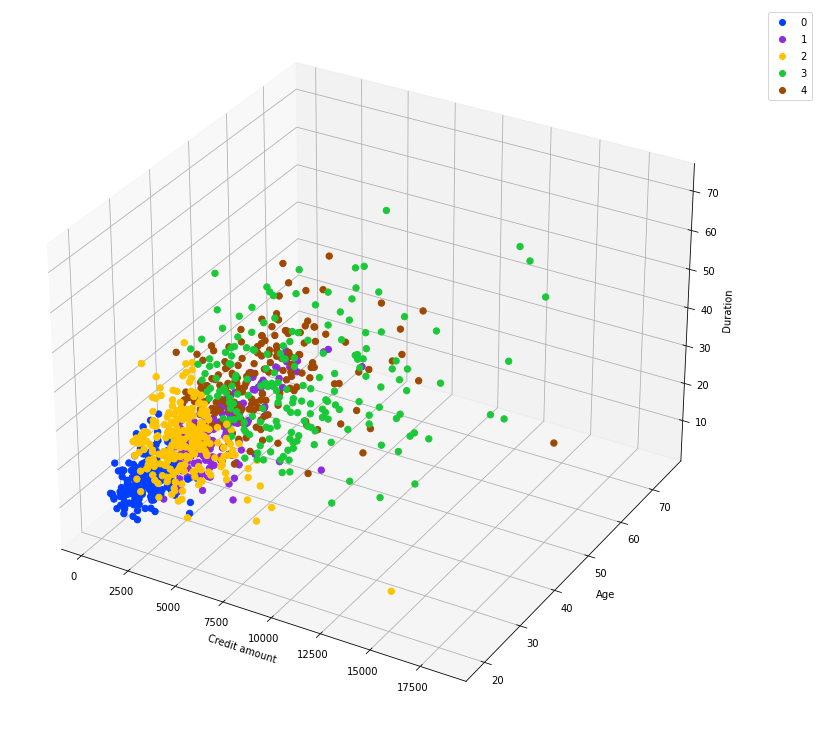

In [14]:
#The same procedure as before is done, but with a preference of -160 rather than -140.
afProp = AffinityPropagation(preference=-160, damping=0.6, verbose=False).fit(scaledCluster)
afLabels = pd.DataFrame(afProp.labels_)

clustered_data_af_Five = dataClustered.assign(Cluster=afLabels)
scatterPlots(clustered_data_af_Five,'Cluster')
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
print(clustered_data_af_Five)
cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

sc = ax.scatter(clustered_data_af_Five['Credit amount'], clustered_data_af_Five['Age'], clustered_data_af_Five['Duration'], s=40, c=clustered_data_af_Five['Cluster'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Age')
ax.set_zlabel('Duration')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)


plt.savefig("scatter_hue", bbox_inches='tight')


## Plot and Cluster interpretation

    Before running the Affinity propagation algorithm, one must consider the Preference score. The preference score tells us how the Affinity propagation algorithm chooses its number of clusters. Wherever a local minima is found, that is the correct number of clusters. From the plot shown above, there appear to be two numbers: 4 and 5. 

###  For the 4 Cluster plots

    The four cluster plots divide the customers in a square-like pattern. Both features, in any of the scatter plots, are divided right in the middle, and the resulting four quadrants represent each cluster, aside from the first one. The first one, in fact, sees clusters 1 and 2 with almost the same values for Credit Amount and Duration, while clusters 0 and 3 veer towards the right. For the Age-based plots, clusters 0 and 3 have a high 'Duration' and 'Credit amount' mean, while clusters 2 and 3 have a higher Age mean. Clusters, 0 and 1, on the other hand, have a lower Age mean, with cluster one also having a lower Duration or Credit amount mean.

    The four clusters can be categorized this way:

* 0 --> Younger customers that take spend the biggest credits and take the most to repay. Most likely have the highest paying job and own their house.
* 1 --> Younger customers who take out some of the smallest credits and usually take little time to pay them back. Probably used for their cars or education and are probably either living under rent or have free housing.
* 2 --> Older customers who take out the smallest amount of credits (theirs is the smallest singular value) and take the least time to give it back (smallest singular value again). Probably used for either Radio/TV or repairs. Most likely are not wealthy and own their own home.
* 3 --> Older customers who take out higher credits and give them back in a longer time. They probably own their house and have a well paying job. 

### For the 5 Cluster plots

    While with 4 clusters, the customers were mainly segmented based on their age, with 5 clusters the datapoints are divided based on the 'Age' feature and 'Credit amount' feature. The clusters remain virtually the same, although all of them veer to the right and all of their means get smaller, except for Cluster 3, having the Credit amount and Duration mean increasing, whilst having a massive increase in variance regarding the Credit amount. The new Cluster, 4, sits between 2 and 3, tending to the right. It has a medium-high mean and high variance for Age and a medium mean for Duration, while having a low mean for Credit amount.

    The new cluster can be categorized this way:

* 4 --> The group with the highest average age, it takes medium amounts of credits and gives them back in a time that is neither too long or too short. Most likely owns their own home, and most likely uses this money either for their Radio/TV or their car. They, also, most likely have a high paying job. They are a group full of outliers.

In [15]:
#The mean value for each of the clusters is found.
#This is for four clusters.

afGrouped = clustered_data_af.groupby(['Cluster']).mean().round(1)
afGrouped

Age  Credit amount  Duration
Cluster                               
0        28.7         5593.7      32.2
1        27.9         1654.3      15.1
2        46.0         1551.7      10.7
3        47.5         4977.9      27.6

In [16]:
#The max value for each of the clusters is found, along with its extremeties.
#This is for four clusters.

afGroupedMax = clustered_data_af.groupby(['Cluster']).max().round(1)
afMaxGroupedAge = afGrouped['Age']
afMaxGroupedCreditAmount = afGrouped['Credit amount']
afMaxGroupedDuration = afGrouped['Duration']
afGroupedMax

Age  Credit amount  Duration
Cluster                              
0         39          18424        72
1         40           3973        36
2         75           6761        24
3         75          15945        60

In [17]:
#The min value for each of the clusters is found, along with its extremeties.
#This is for four clusters.

afGroupedMin = clustered_data_af.groupby(['Cluster']).min().round(1)
afGroupedMinAge = afGroupedMin['Age']
afGroupedMinCreditAmount = afGroupedMin['Credit amount']
afGroupedMinDuration = afGroupedMin['Duration']
afGroupedMin

Age  Credit amount  Duration
Cluster                              
0         20           1842         6
1         19            276         4
2         29            250         4
3         35           1258         6

In [18]:
#The mean value for each of the clusters is found.
#This is for five clusters.
afGrouped = clustered_data_af_Five.groupby(['Cluster']).mean().round(1)
afGrouped

Age  Credit amount  Duration
Cluster                               
0        26.2         1284.4      12.0
1        43.0         1523.6       9.6
2        27.4         3059.4      23.0
3        35.4         7598.3      38.1
4        48.1         2911.9      21.0

In [19]:
#The max value for each of the clusters is found, along with its extremeties.
#This is for five clusters.
afGroupedMax = clustered_data_af_Five.groupby(['Cluster']).max().round(1)
afMaxGroupedAge = afGroupedMax['Age']
afMaxGroupedCreditAmount = afGroupedMax['Credit amount']
afMaxGroupedDuration = afGroupedMax['Duration']
afGroupedMax

Age  Credit amount  Duration
Cluster                              
0         36           3577        24
1         75           6761        18
2         35          14555        48
3         63          18424        72
4         75          14896        48

In [20]:
#The min value for each of the clusters is found, along with its extremeties.
#This is for five clusters.
afGroupedMin = clustered_data_af_Five.groupby(['Cluster']).min().round(1)
afGroupedMinAge = afGroupedMin['Age']
afGroupedMinCreditAmount = afGroupedMin['Credit amount']
afGroupedMinDuration = afGroupedMin['Duration']
afGroupedMin

Age  Credit amount  Duration
Cluster                              
0         19            276         4
1         29            250         4
2         20           1193         6
3         21           2751        15
4         35            571         6

# THE SECOND PART 
    
    As stated previously, the second part of the projct will see the other categorical features turned to numerical. They will be assigned numbers from 0 to n, with n+1 different categories. 

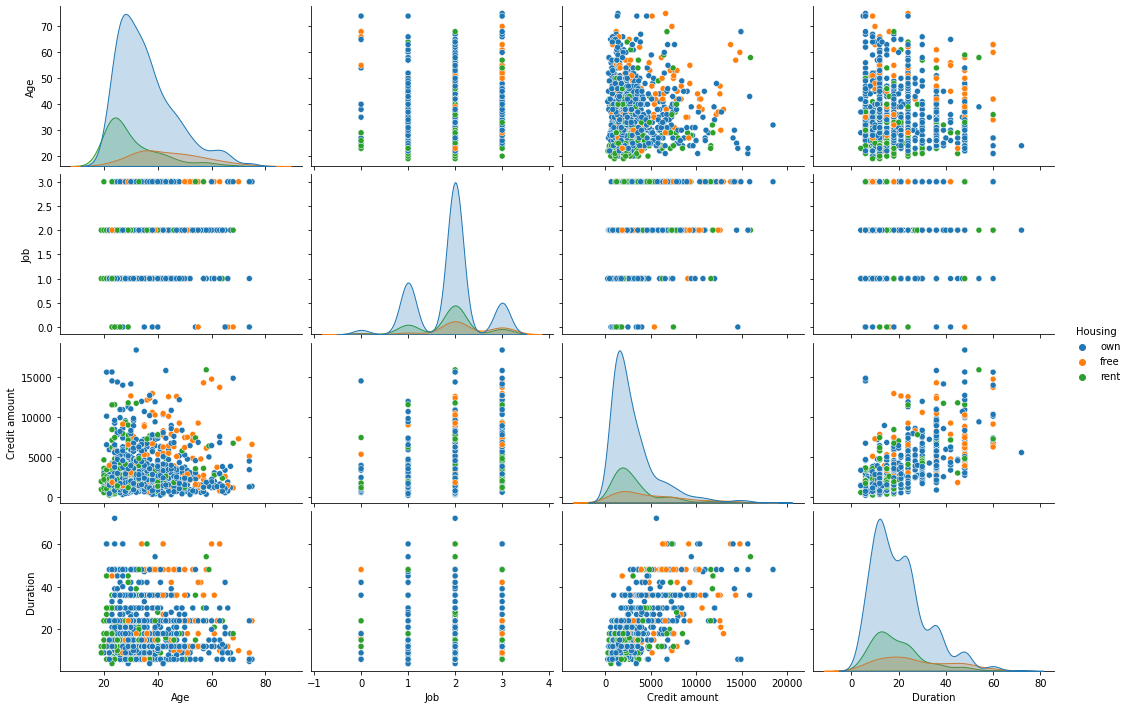

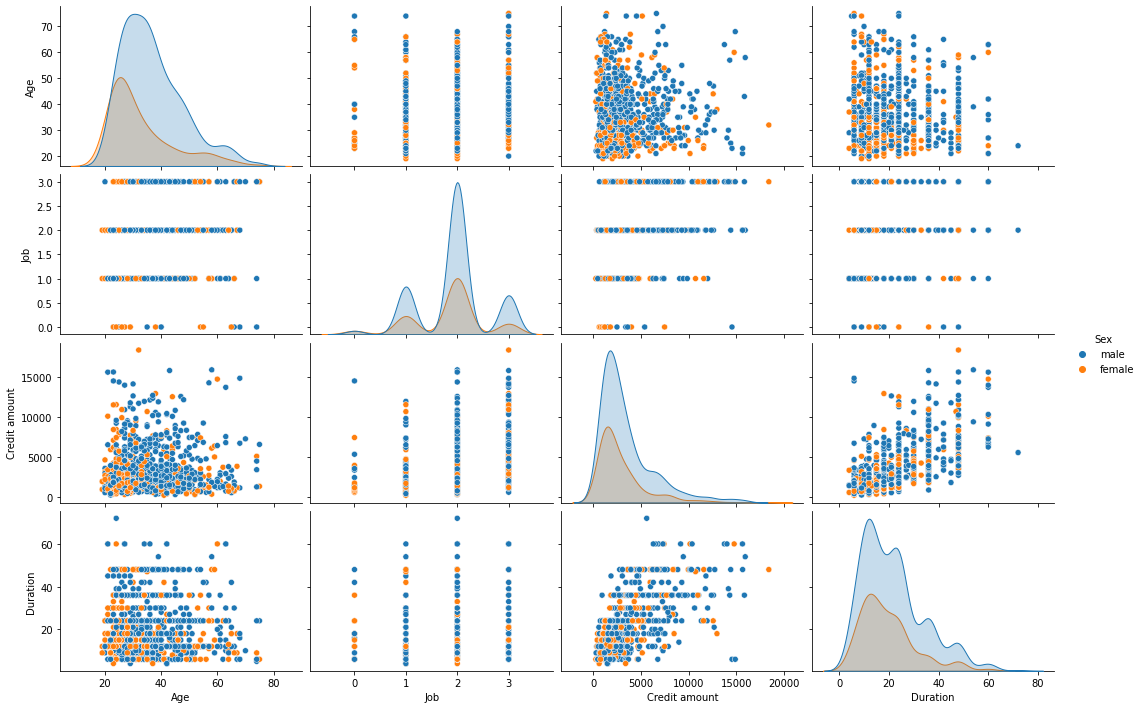

In [21]:
from sklearn.preprocessing import StandardScaler

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
import os
import warnings
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth

#The database is once again brought into the dataframe and more insteresting visualization is computed, using pairplots instead os scatterplots,
#with a central focus on Housing and Sex.
df = pd.read_csv(r'C:\Users\marti\OneDrive\Desktop\project2\german_credit_data.csv')
df.drop(df.columns[0], inplace=True, axis=1)
sb.pairplot(df, hue='Housing', aspect=1.5)
plt.show()
sb.pairplot(df, hue='Sex', aspect=1.5)
plt.show()
#Null records are dropped.
df = df.dropna()
#This is what distinguishes the first and second part: all of the categorical values are replaced by numbers through the function '.replace()'.
df['Sex'].replace(['male','female'],[0,1], inplace = True)
df['Housing'].replace(['free','rent', 'own'],[0,1,2], inplace = True)
df['Saving accounts'].replace(['little','moderate', 'quite rich', 'rich'],[0,1,2,3], inplace = True)
df['Checking account'].replace(['little','moderate','rich'],[0,1,2], inplace = True)
df['Purpose'].replace(['radio/TV','education', 'furniture/equipment', 'car', 'business','domestic appliances', 'repairs', 'vacation/others'],[0,1,2,3,4,5,6,7], inplace = True)




## Plot interpretation

    Two different multiplot graphs are presented; the first one differentiating the datapoints based on Housing, and the second based ON sEX. From the plots, it can be seen that most people who own their house take out little credit, and, as stated previously, women tend to be younger.

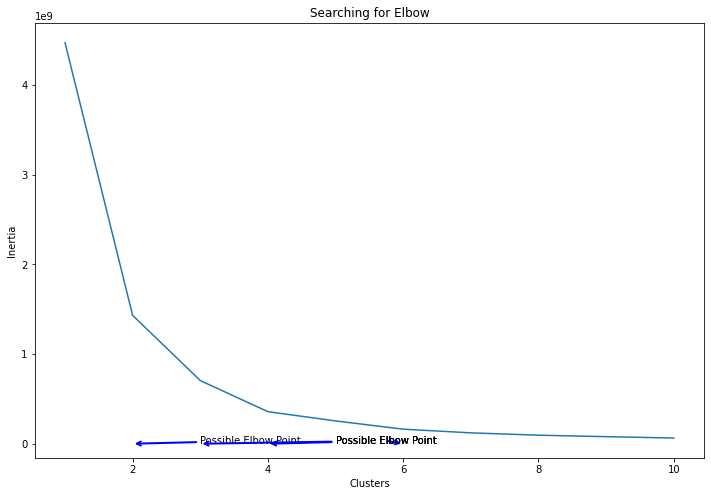

In [22]:
from sklearn.cluster import KMeans

clusters = []
#KMeans is the first algorithm to be run, and a variety of clusters are run on it to determine the inertia.
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)

#Figures are made to hold the elbow point graph and its annotations.
fig, axys = plt.subplots(figsize=(12, 8))
sb.lineplot(x=list(range(1, 11)), y=clusters, ax=axys)
axys.set_title('Searching for Elbow')
axys.set_xlabel('Clusters')
axys.set_ylabel('Inertia')

#Each elbow point is found and an arrow is pointed at it so that the reader mau better visualize it as well.
axys.annotate('Possible Elbow Point', xy=(2, 140000), xytext=(3, 50000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

axys.annotate('Possible Elbow Point', xy=(3, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

axys.annotate('Possible Elbow Point', xy=(4, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

axys.annotate('Possible Elbow Point', xy=(6, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))

plt.show()

## The Elbow point

    When discussing KMeans, another way of discovering the correct number of clusters is by finding out the 'Elbow point'. Said 'Elbow point' is actually a point of inflection where the slope changes dramatically; whenever this happens, then it represents a reasobable number of clusters. The more dramatic the change, the better the number. In this case, the best points seem to be 2 and 4, but 3 and 6 will also be analyzed.

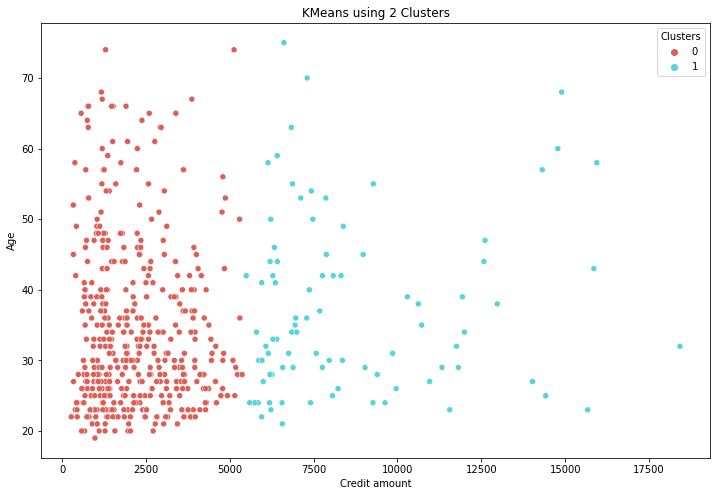

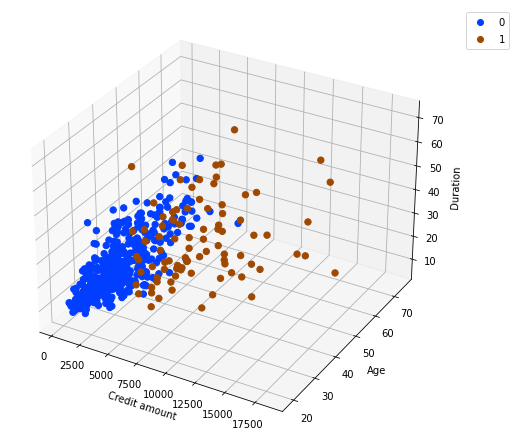

In [23]:
#Two cluster KMeans is run
km2 = KMeans(n_clusters=2).fit(df)
#The 'labels' feature is the cluster number for each record. It is attached to the database.
df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
#A scatterplot is created to show the new data.
sb.scatterplot(df['Credit amount'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 2))
plt.title('KMeans using 2 Clusters')
plt.show()
#A 3d scatterplot is also used to show the new data.
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

#Seaborn provides new colors 
cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

#The 3d graph is plotted, with legends, and it is saved.
sc = ax.scatter(df['Credit amount'], df['Age'], df['Duration'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Age')
ax.set_zlabel('Duration')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("scatter_hue", bbox_inches='tight')


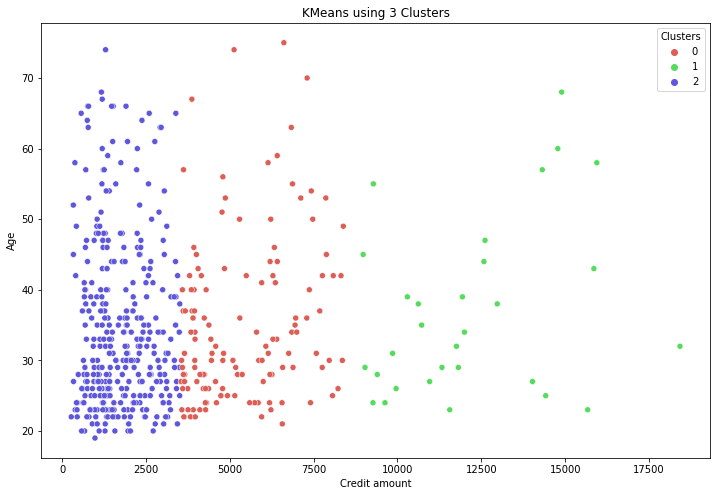

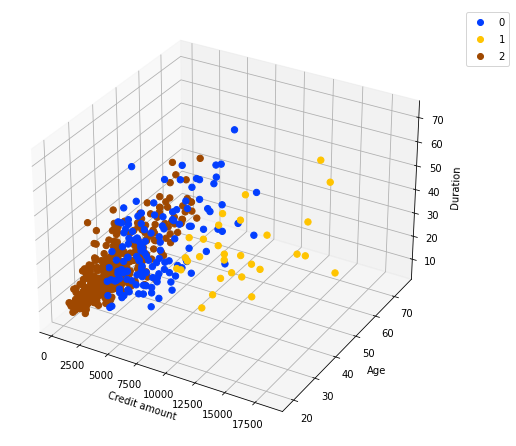

In [24]:
#Same process as before, but with 3 clusters.
km3 = KMeans(n_clusters=3).fit(df)

df['Clusters'] = km3.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Credit amount'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 3))
plt.title('KMeans using 3 Clusters')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

sc = ax.scatter(df['Credit amount'], df['Age'], df['Duration'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Age')
ax.set_zlabel('Duration')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


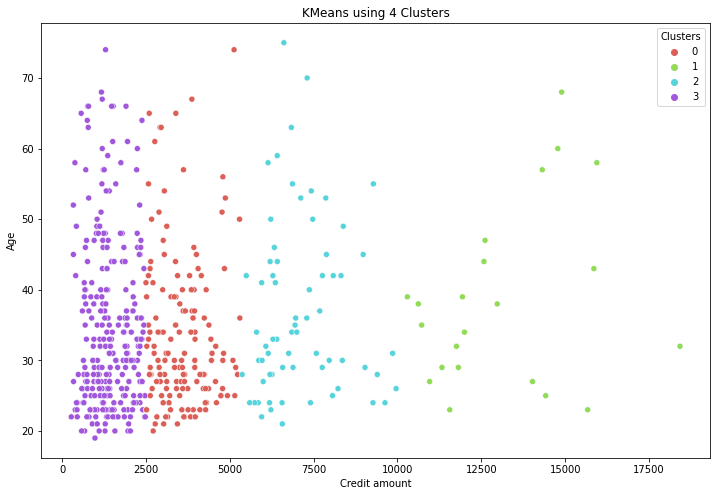

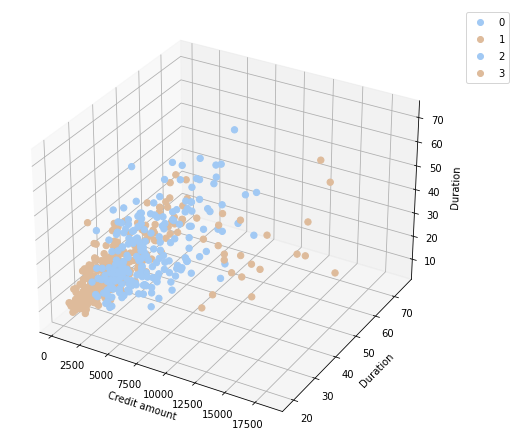

In [25]:

#Same process as before, but with 4 clusters.
km4 = KMeans(n_clusters=4).fit(df)

df['Clusters'] = km4.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Credit amount'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 4))
plt.title('KMeans using 4 Clusters')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("pastel", 256).as_hex())

sc = ax.scatter(df['Credit amount'], df['Age'], df['Duration'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Duration')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


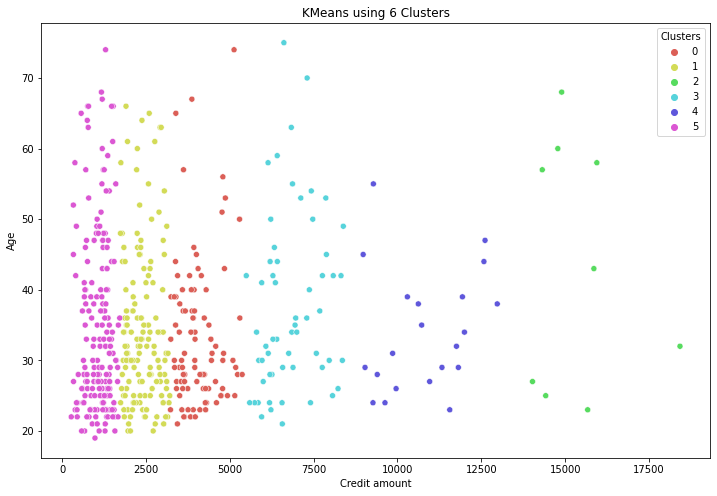

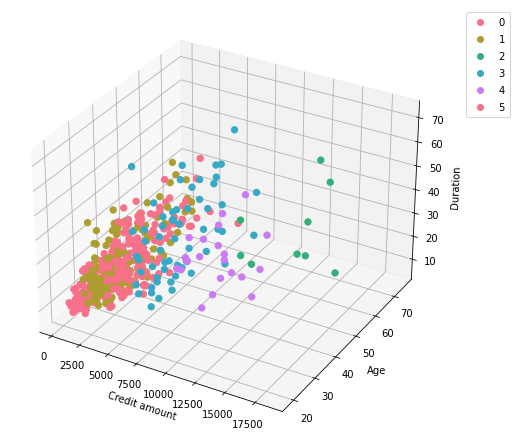

In [26]:
#Same process as before, but with 6 clusters.
km6 = KMeans(n_clusters=6).fit(df)

df['Clusters'] = km6.labels_
forestDf = df
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Credit amount'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 6))
plt.title('KMeans using 6 Clusters')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

sc = ax.scatter(df['Credit amount'], df['Age'], df['Duration'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Age')
ax.set_zlabel('Duration')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


## Cluster Interpretation

    Now that KMeans has been run again on Credit amount vs Age, the results are clear: the algorithm divides the clusters up based on Credit amount. Each cluster has similar mean pertaining to Age, while it identifies different customer segments, each one taking out different Credit amounts.

### 2 Clusters

    The two groups analyzed differ when the CA reaches a little more than 5000 euros. There left cluster is much denser than the right. The right presents a variety of outliers, which will be grouped with more clusters.

### 3 Clusters 

    The leftmost cluster from the previous analysis is kept, while the right one is split into two. Near 10000 euros is where the splitting happens. The center cluster is more rightfully grouped, while the right one keeps the need of clustering, to group the different outliers.

### 4 Clusters

    The leftmost cluster is split into two, having similar densities and data point, while the center one is kept, only missing a few data points, given to the new, rightmost cluster. The latter has a reduced variance compared to the previous iterations, but for the sake of a correct analysis, another grouping must be done.

### 6 Clusters

    The datapoints finally seem to be grouped in a correct way; 6 clusters look perfect. On the left, the first three clusters represent people who take out smaller credits, each with a very well defined range. On the right, there is the group of outliers, made of three clusters, each with increasing mean and variance, and decreasing number of datapoints. While the 5 leftmost clusters can be seen as different classes of spendors, the last, rightmost one can be seen as the cluster of outliers, those who take out the biggest loans, and the one with the fewest customers.

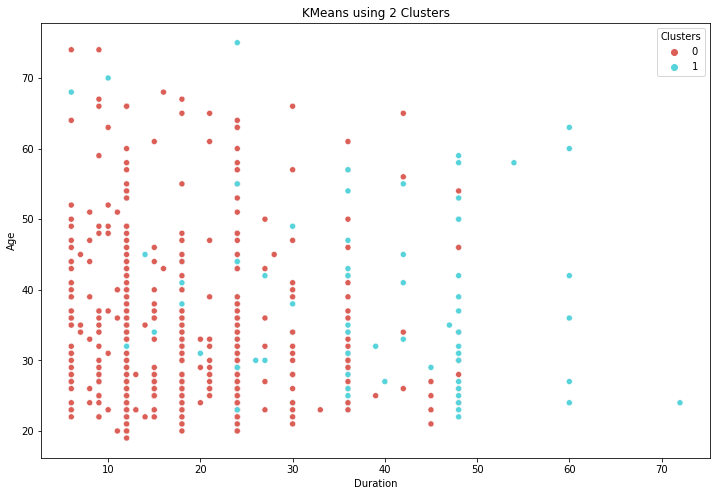

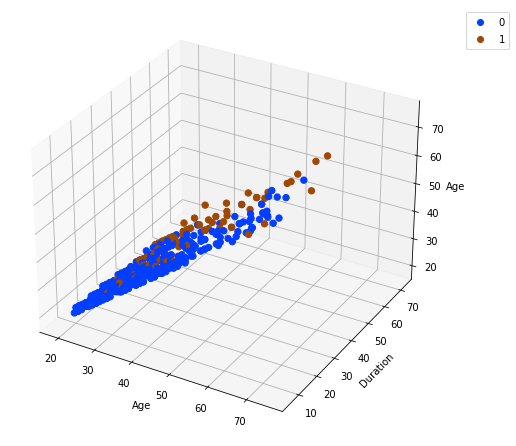

In [27]:
#Two clusrered KMeans is then used to analyze Age vs Duration, to test out the relationship between two other features.
#The process is the same as before.
km2 = KMeans(n_clusters=2).fit(df)
df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
#The change happens here.
sb.scatterplot(df['Duration'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 2))
plt.title('KMeans using 2 Clusters')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

sc = ax.scatter(df['Age'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


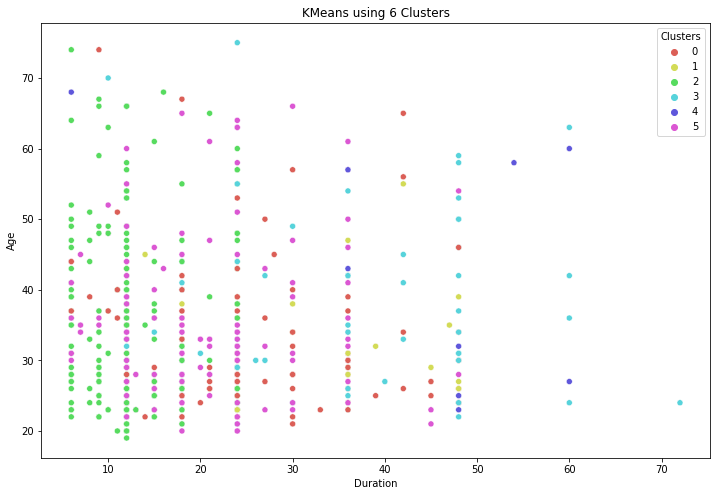

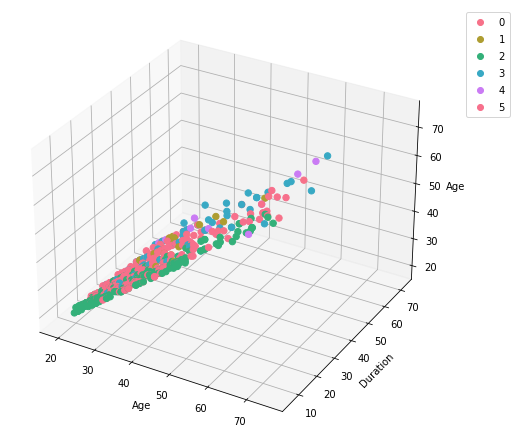

In [28]:
#The same process as before is repeated with 6 clusters.
km2 = KMeans(n_clusters=6).fit(df)

df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Duration'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 6))
plt.title('KMeans using 6 Clusters')
plt.show()

fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())


sc = ax.scatter(df['Age'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


## Plot and cluster intepretation

    Subsequent testing has been done to observe the relationship between Duration and Age. As stated in PART I, there is none. KMeans has no way of forming clear cut clusters between Duration vs Age, whether it is with 2 clusters, or with the more precise 6 cluster analysis. The different coloured data points become mixed up and there is no way to differentiate between them. 

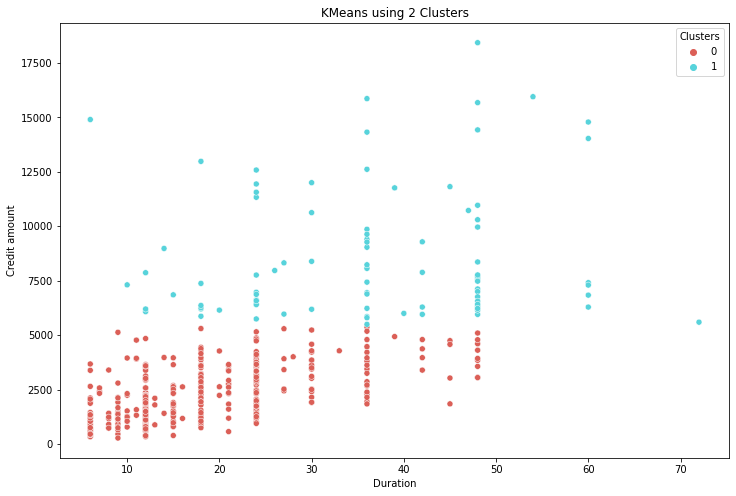

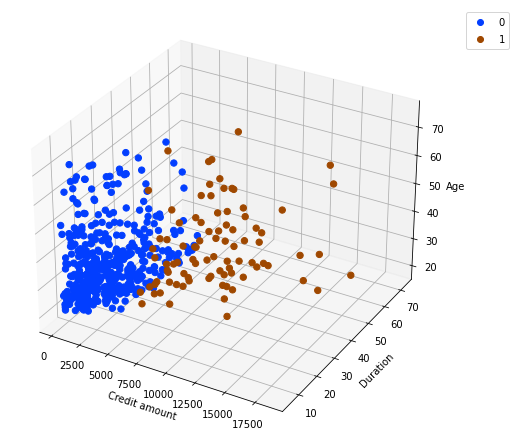

In [29]:
#Four other plots are created, same as before, to analyze the relationship Duration vs Credit amount.
km2 = KMeans(n_clusters=2).fit(df)

df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Duration'], df['Credit amount'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 2))
plt.title('KMeans using 2 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


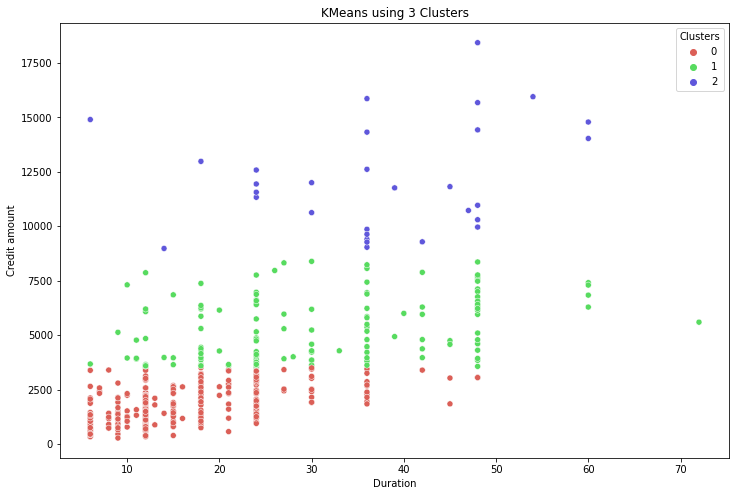

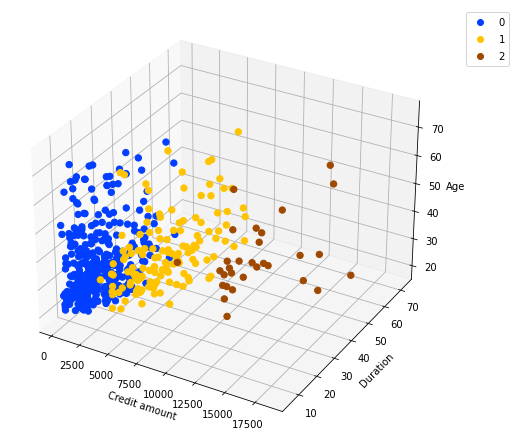

In [30]:
km2 = KMeans(n_clusters=3).fit(df)

df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Duration'], df['Credit amount'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 3))
plt.title('KMeans using 3 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("bright", 256).as_hex())

sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


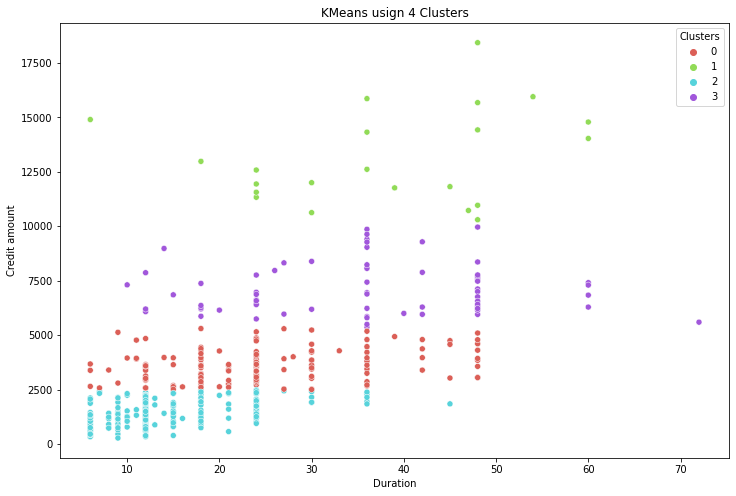

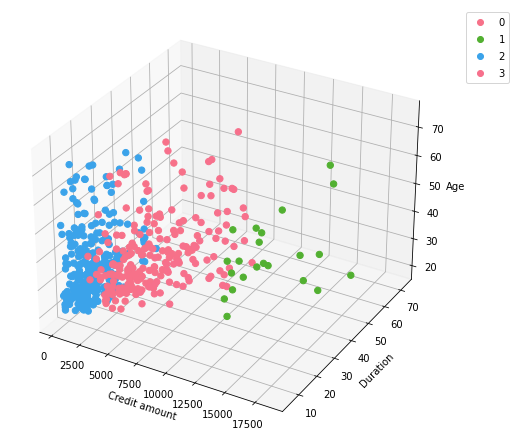

In [31]:
km2 = KMeans(n_clusters=4).fit(df)

df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Duration'], df['Credit amount'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 4))
plt.title('KMeans usign 4 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')


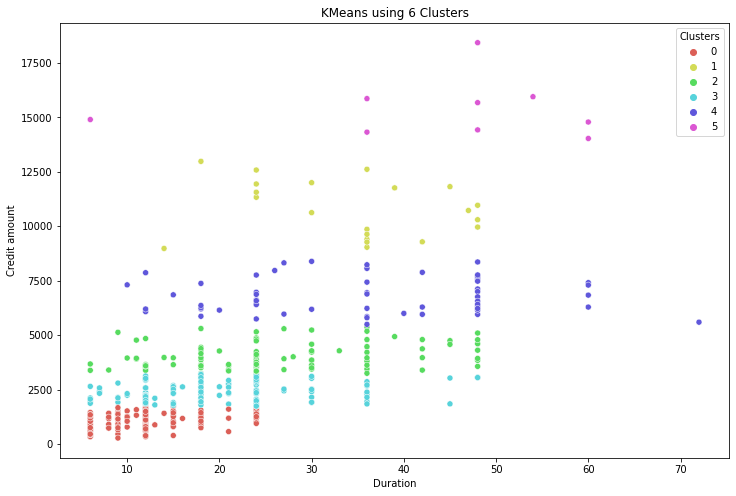

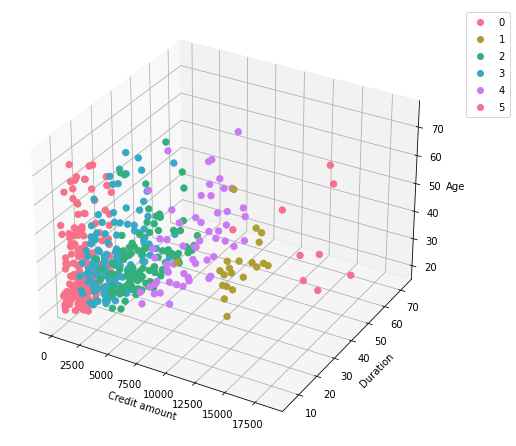

In [32]:
km2 = KMeans(n_clusters=6).fit(df)

df['Clusters'] = km2.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Duration'], df['Credit amount'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', 6))
plt.title('KMeans using 6 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')


## Plot and cluster Intepretation

    Using KMeans, one last analysis is run to see the relationship between Duration vs Credit Amount. Once again, Kmeans differentiates the customers based on their Credit amount, not paying anymore attention to other features, altough Duration is taken into account more than Age.

    It can be seen, from the plots, that each Duration group tends to lose more variance with each iteration of the program than Age.

### 2 Clusters

    The clusters divide when the Credit Amount reaches about 6000 euros; the upper Cluster spans from virtually 0 Duration to the end, while the lower one is more contained, beginning from 0 Duration and ending at around 50 weeks.

### 3 Clusters

    The uppermost cluster is divieded into two, while the lower cluster gives up some of its data points to the newly formed center one. The rift between the newly formed clusters happens at around 7500 euros, with the new group representing the outliers. 

### 4 Clusters

    Each cluster is now more divided, and the Duration feature begins receiving more attention. From bottom to top, the first cluster represents the customers that take smaller loans and give them back fairly quickly; it has many customers. The second cluster represents customers that take out loans marginally bigger than the previous, but give them back in double the time, sometimes. The third cluster represents customers that take out bigger loans, and can give them back anywhere from virtually immediately to more than a year later. The last cluster is the outliers, with almost no one in their group, these people take out massive sums of money and there is no clear indication on whether they will give them back.

### 6 Clusters

    The characteristics from the previous iteration are now amplified and, as a result, their variance shrinks dramatically. Two new ggroups form at the top, with the fifth cluster representing people who take out large sums of money and give them back between 15 and 50 weeks afterwards. The last group, predictably, represents the outliers, almost identical to the outlier cluster of the last generation, but with fewer members.

    

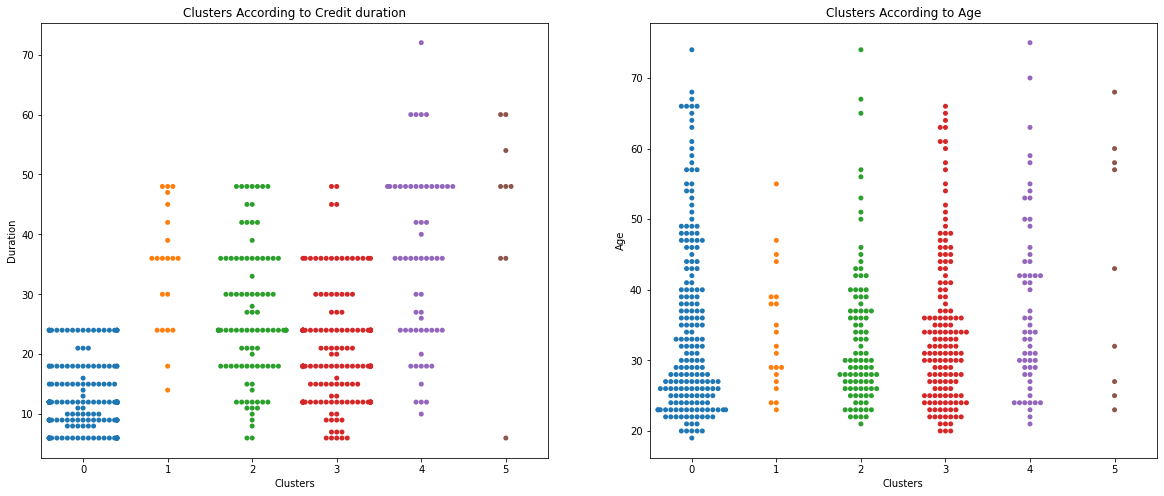

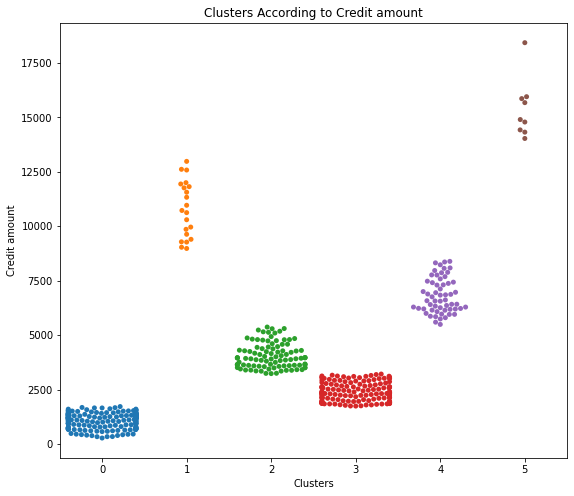

In [33]:
#Three different plots are created that stay on the same pictureframe; they each represent the clustering of one of the three most
#influential features.
fig = plt.figure(figsize=(20,8))
axys = fig.add_subplot(121)
sb.swarmplot(x='Clusters', y='Duration', data=df, ax=axys)
axys.set_title('Clusters According to Credit duration')

axys = fig.add_subplot(122)
sb.swarmplot(x='Clusters', y='Age', data=df, ax=axys)
axys.set_title('Clusters According to Age')


plt.show()
fig = plt.figure(figsize=(20,8))
axys = fig.add_subplot(122)
sb.swarmplot(x='Clusters', y='Credit amount', data=df, ax=axys)
axys.set_title('Clusters According to Credit amount')
plt.show()


## Plot interpretation

    All of the 6 cluster datapoints are plotted, in order to view the quality of each of the three main categories that were chosen. What is observed from the three plots is that cluster 2 and 6 are the ones with the scarcest populations; this means that there are not a lot of customers that take out large sums of money and give them back over larger periods of time, and there are not a lot of customers that take out extremely large sums, just to give them back unpredictably. The first two  plots don't have very well defined clusters: they are not the best features to examine. The third one gives a clear indication on how crucial Credit amount is to the database, as all of its clusters are well defined. 

## Agglomerative clustering

    Agglomerative clustering is another clustering technique that will be used to examine what other potential clusters can be formed from this dataset. Are there more groups that the bankers should be aware of? Or can the same clusters have different means and variances, in an unprecedented way?

    Agglomerative clustering uses hierarchys to differentiate between clusters; what stands out more and what is more influential takes the lead. The effect of this analysis will also be viewed through the use of a dendogram.

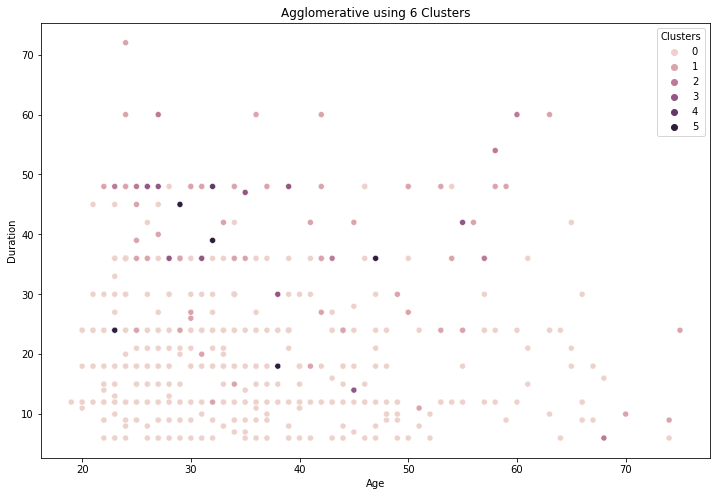

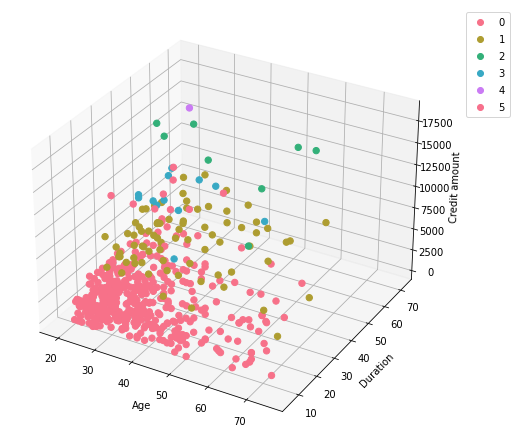

In [34]:
#Agglomerative clustering is used with 6 different clusters.
#The same procedure that is used for KMeans is used for agglomerative as well.
agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(df)
df['Clusters'] = agglom.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Age'], df['Duration'], hue=df['Clusters'])
plt.title('Agglomerative using 6 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

sc = ax.scatter(df['Age'], df['Duration'], df['Credit amount'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Credit amount')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')



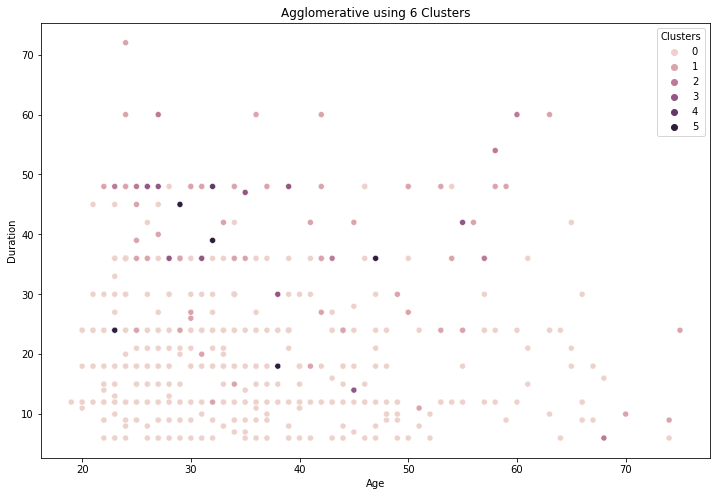

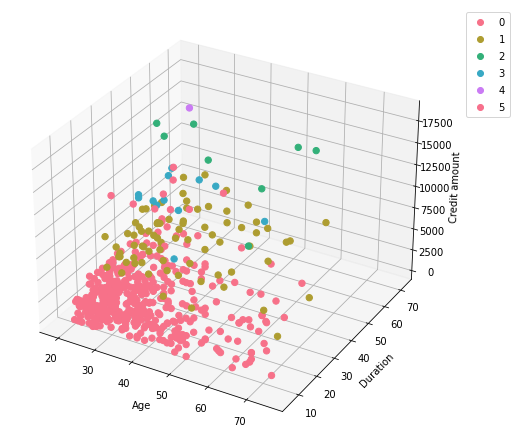

In [35]:
#Agglomerative clustering is used for Age vs Duration afterwards.
agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(df)
df['Clusters'] = agglom.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Age'], df['Duration'], hue=df['Clusters'])
plt.title('Agglomerative using 6 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

sc = ax.scatter(df['Age'], df['Duration'], df['Credit amount'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Age')
ax.set_ylabel('Duration')
ax.set_zlabel('Credit amount')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')



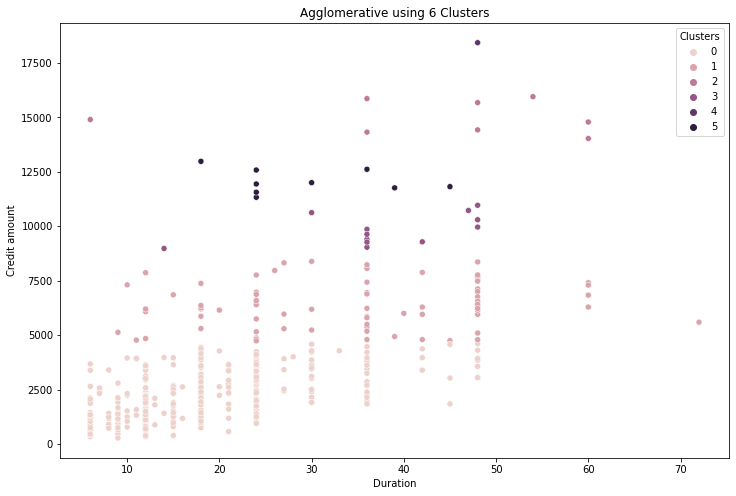

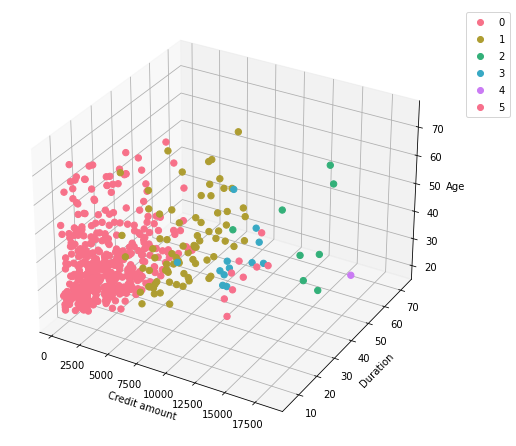

In [36]:
#The agglomerative clustering algorithm is used to analyze Duration vs Credit amount.
agglom = AgglomerativeClustering(n_clusters=6, linkage='average').fit(df)
df['Clusters'] = agglom.labels_
secondForest = df
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Duration'], df['Credit amount'], hue=df['Clusters'])
plt.title('Agglomerative using 6 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())


sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


## Plot and cluster interpretation

    Agglomerative clustering, the project's second clusterign method, has been run only for the ideal amount of 6 clusters.  Thee results might look similar to KMeans, but if analyzed deepers, there are some differences.

### Age vs Credit amount

    The same indicative groups as the previous methods stand, although the means for the lower clusters have increased, along with a reduction of variance from the upper clusters. It seems that the lower groups have more datapoints, with the outlier groups containing only a handful, with the last having only one datapoint.

### Age vs Duration

    As with the previous iterations, there are no clear clusters in sight.

### Duration vs Credit amount

    Compared to the KMeans, agglomerative places more attention on the Duration feature. Each of the clusters have less variance and more distant means, with the second to last cluster being contained between 40 and 60 weeks (with one outlier, compared to 15 and 50). The last group, once again, contains only one datapoint.

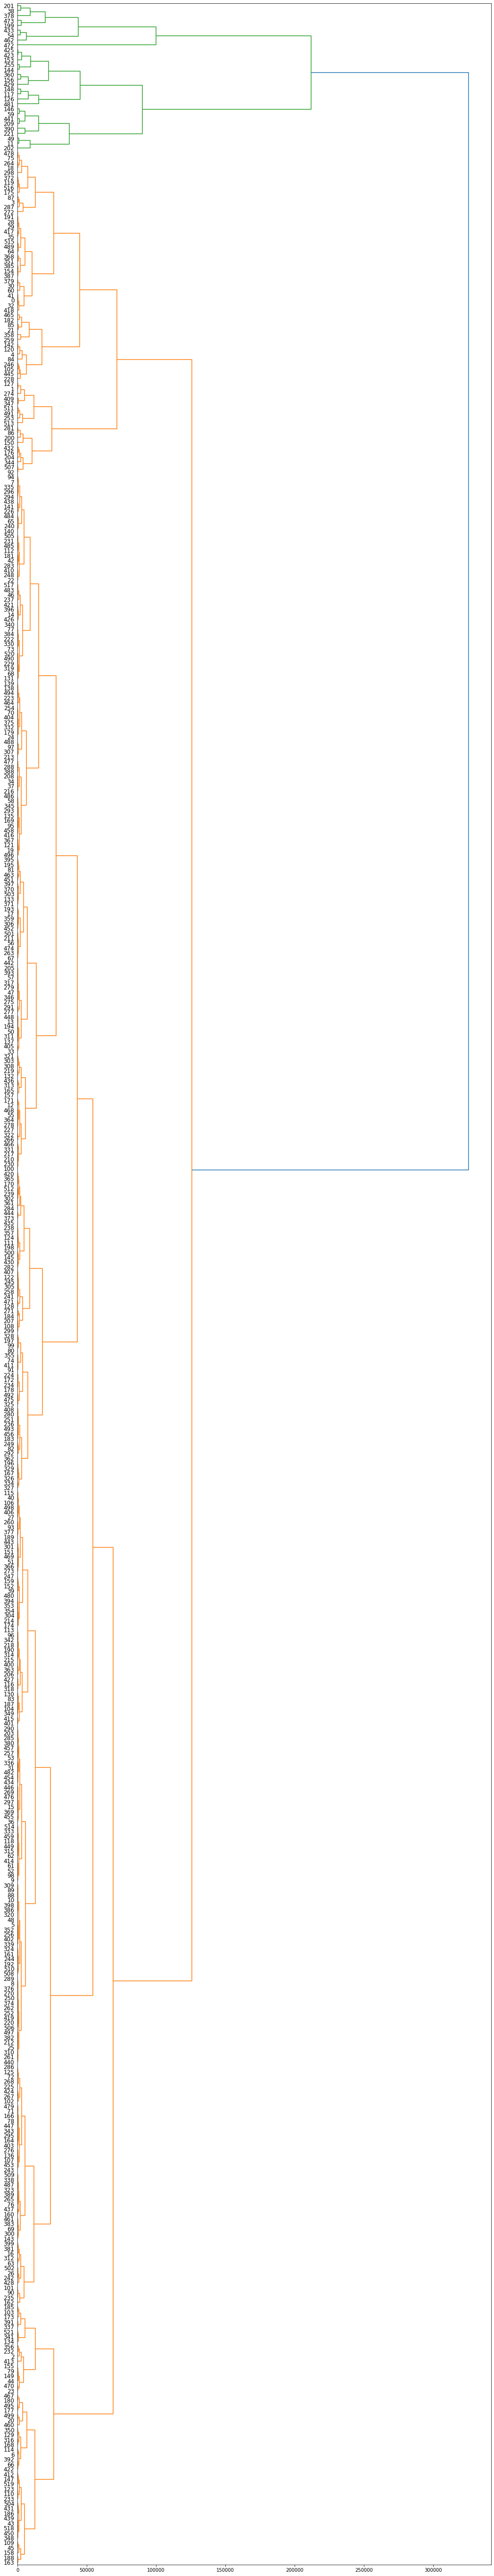

In [37]:
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

#Thanks to the agglomerative clustering, a dendogram  diagram can be computed.
#Firstly, it creates a matrix of distances between adjacent datapoints.
distance = distance_matrix(df, df)
#It then creates a hierarchical structure between the different datapoints based on the distances.
Z = hierarchy.linkage(distance, 'complete')
#This structure can then be plotted
plt.figure(figsize=(18, 100))
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

## The Dendogram

    The result of agglomerative clustering is a massive plot called a Dendogram. While this specific graph is not very informative, it shows how similar and how related different Credit amounts are related to each other. It divides the amounts in three different categories: green, orange and blue, with blue being the link between the previous two. The x-axys represents the Credit amounts, while the y-axys represents the distances between the different data points. The closest data points have the same color and are in the same color group. The orange group seems to have more data points and have larger variance, while the green group is more tightnit together. The blue group, on the other hand, links them with each other, showing that they are from the same database.


## The DBSCAN algorithm

    The fourth algorithm used is DBSCAN, which stands for Density Based Spatial Clustering, is a density based algorithm. The previous methods regard partition-based clustering and hierarchical clustering, which are great for normal shaped clusters; however, when it comes to arbitrary shaped clusters or detecting outliers, density based techniques are more efficient. In the previous explorations, the presence of outliers have determined the creation of new, dedicated clusters. With DBSCAN, hopefully, a more accurate representation of the database can be made.

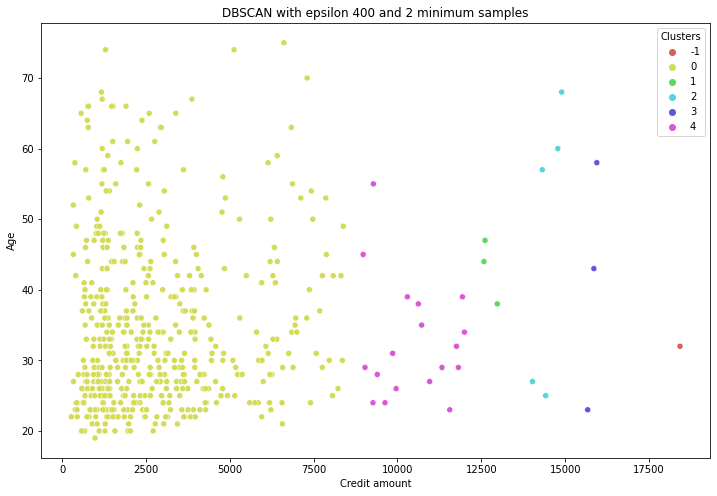

<Figure size 1440x1080 with 0 Axes>

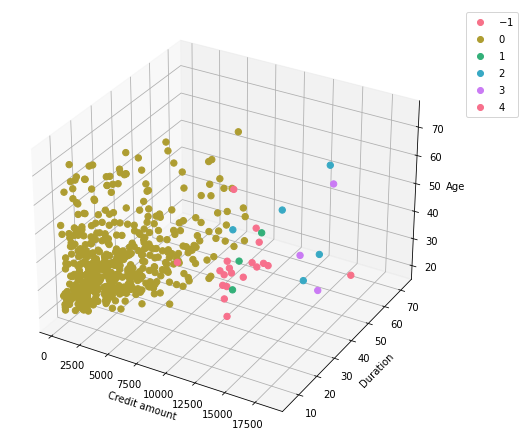

In [38]:
from sklearn.cluster import DBSCAN 
from sklearn.cluster import MeanShift, estimate_bandwidth
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

#The DBSCAN algorithm is run to find outliers.
#It works based on two parameters: epsilon, which is the radius in which another datapoint must be included in order to identify it in a specific cluster
#and minimum samples, which are the minimum samples needed to form a cluster.
#From trial and error, the ideal values appear to be 400 for epsilon and 2 for minimum samples, although it varies from database to database.
#Based on these parameters, the algorithm will decide on the correct number of clusters.
db = DBSCAN(eps=400, min_samples=2).fit(df)

df['Clusters'] = db.labels_
thirdForest = df
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Credit amount'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 400 and 2 minimum samples')
plt.show()
fig = plt.figure(figsize=(20,15))



fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.savefig("scatter_hue", bbox_inches='tight')


## The Epsilon and the minimum samples

    Unlike the previous algorithms, DBSCAN chooses the number of clusters based on two parameters: Epsilon and the minimum samples. The Epsilon represents the distance that specifies a neighborhood. What this means is that, if the distance between two data points is less or equal than the Epsilon, then they are considered to be neighbors and are most likely going to be in the same cluster. The minimum number of samples represents the minimum number of datapoints used to make a cluster. Based on these two parameters, the datapoints can then be classified as:

* Core points: if it is sorrounded by the minimum number of points around its area, with radius Epsilon.
* Border pint: if it is reachable from a core point and has leff then the minimum number of samples around it.
* Outlier: if it is neither reachable and isn't a core point.

## Plot and cluster interpretation

    Through trial and error, the correct Epsilon is chosen to be 400, with the minimum number of datapoints being 2. This was the best approximation, as anything else would have either created two indistinguishable clusters or 521 different ones. The plot is made to be Credit amount vs Age, and there is a total of 6 clusters. The results are might appear disappointing, but when delving deeper, it can be seen that the rightmost clusters take in outliers with a good accuracy, and base them off of Age, and not Credit amount,  finally giving the Age feature importance. While 7 clusters were needed, to divide the massivee first clusters, this is a good enough approximation. The researcher that carried out the project deems it a success. 

## Meanshift clustering

    The final clustering algorithm to be used is meanshift clustering. Meanshift clustering is centroid based, meaning that it works by updating candidates for centroids to be the mean of the points within a given region (mean SHIFT). It works very well on spherical based data. When looking at the previous data plots, it can be observed that the dataset is spherical only in certain parts, particularly at the upper end of the Credit amounts. This algorithm is implemented in order to give us different levels of classifications for those specific regions.

    Age vs Duration will not be analyzed during these trials - the lesson has been learned. 4 Clusters are going to be used with Credit amount vs Age and Credit amount vs Duration. As stated previously, the emphasis is on the spherical distributions of the dataset.

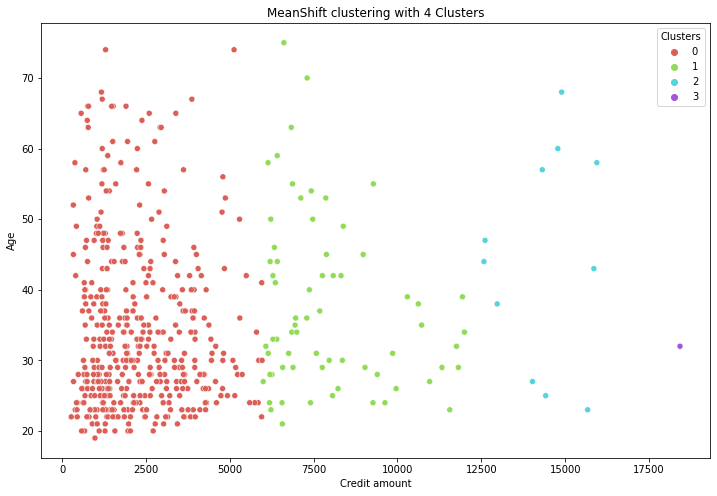

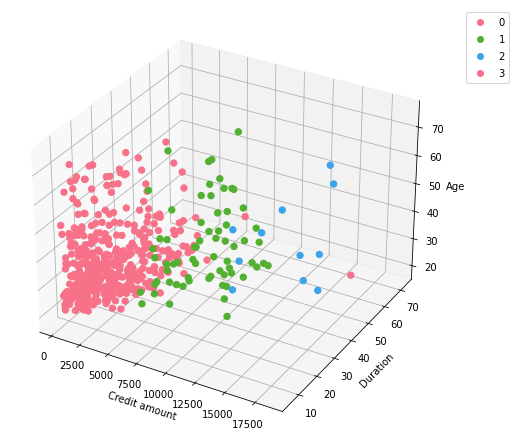

In [39]:
#The meanshift clustering algorithm is ran. Meanshift finds its own number of clusters, and in this case it is four.
ms = MeanShift().fit(df)

df['Clusters'] = ms.labels_
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Credit amount'], df['Age'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering with 4 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')
# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')


[0 1 2 3]


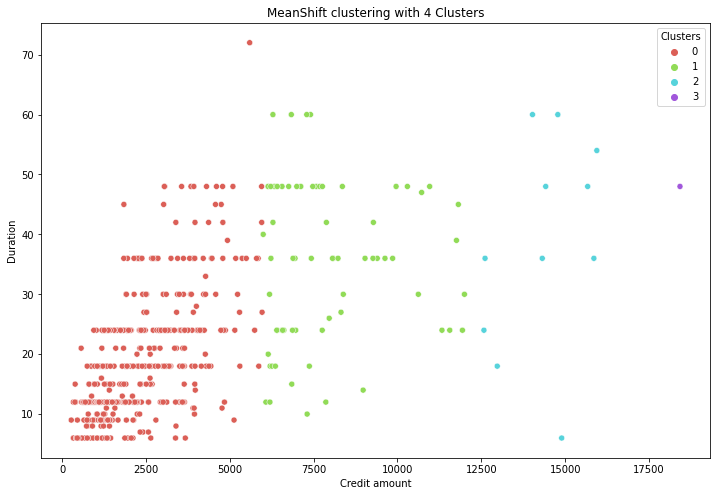

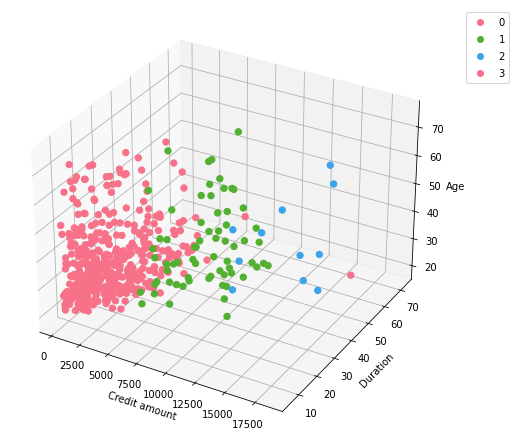

In [40]:
#Meanshift is run again to view Credit amount vs Duration.
ms = MeanShift().fit(df)
df['Clusters'] = ms.labels_
print(df['Clusters'].unique())
dfForest = df
plt.figure(figsize=(12, 8))
sb.scatterplot(df['Credit amount'], df['Duration'], hue=df['Clusters'], 
                palette=sb.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.plot()
plt.title('MeanShift clustering with 4 Clusters')
plt.show()
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sb.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(df['Credit amount'], df['Duration'], df['Age'], s=40, c=df['Clusters'], marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')


## Plot and cluster interpretation

### Credit amount vs Age

    There are no notable differences when compared to the other algorithms, excpet for the fact that, when analyzing the two rightmost algorithms, it can be observed that the Meanshift program deems a cluster the initial spheres INSIDE the two clusters, and then spans the classification outward. This is not so obviously observed with the other two clusters, as they don't contain a defined sphere inside of them.

### Credit amount vs Duration

    There is a notable difference when compared to the other graphs. The clusters seem to have a positive slope, meaning that Duration is assigned some value of importance. More specifically, the first two clusters diverge when the Credit amount reaches around 6000 euros, while the second and third diverge when it reaches around 12000 euros. The outlier cluster has a data point at around 18500 euros.

# THE THIRD PART 

    As stated previously, the third part focuses on taking all the models and predicting their cluster value through classification. The 'Logistic Regression' classifier will be assigned to this task, which is a personal favorite of the researrcher for this project.

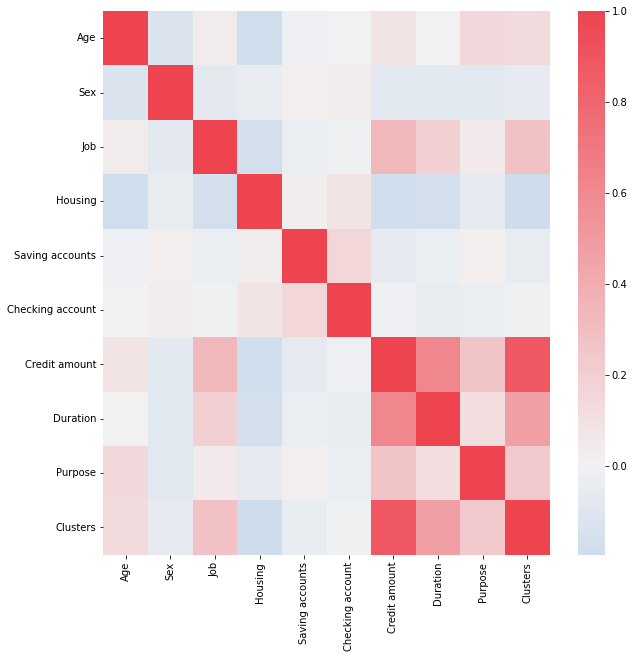

In [41]:
plt.figure(figsize=(10,10))
correlationMap = sb.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)
#Correlation matrix is built from the model and showed as a heatmap through the 'seaborn' library
#It is used to see what features are most influential for eachother.
correlationMatrix = df.corr()
sb.heatmap(correlationMatrix, cmap=correlationMap, center=0)
plt.show()


## Plot interpretation

    A correlation map is ran to see how the different features are correlated when comparing them to clusters. As predicted, the classes 'Credit amount'and 'Duration' taking the lead, followed by 'Purpose' and 'Job'. The 'Age' class is also amongst them. Between the 5 major classes, most analysis' have been done on three of them. It was a good idea to choose them. 

    The following predictions will be done on the KMeans clustered database, the Affinity propagation database and DBSCAN. They are considered the most successful.

The mean absolute error is 0.0380952380952381
Accuracy score:  0.9619047619047619
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00         1

    accuracy                           0.96       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.96      0.96      0.96       105

 --------- 

[0 1 2 3]


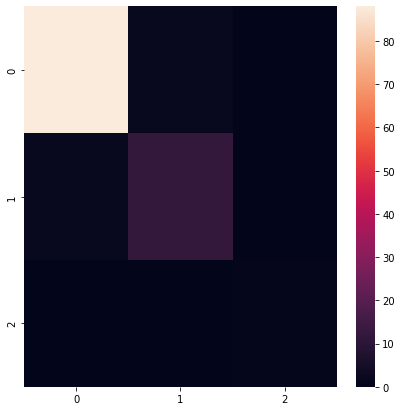

In [42]:
from sklearn.linear_model import LogisticRegression
#The logistic regression classifier is run. The values to predict are the 'Clusters' columns in the different copied databases.
#This logistic regression is for a 6 cluster KMeans distribution.
model = LogisticRegression()
#X and Y are defined, trained, tested and splitted.
Y = forestDf['Clusters']
X = forestDf.drop(columns = 'Clusters')
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.20, random_state = 1)
#The model is fitted and the outputs are predicted.
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
#The MAE, accuracy and classification report is printed.
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print(classification_report(testY, predictedOutput))
print(' --------- \n')
plt.figure(figsize=(7,7))
#Along, a confusion matrix is run to see the results graphically.
sb.heatmap(confusion_matrix(testY, predictedOutput))
print(df['Clusters'].unique())

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00         1

    accuracy                           0.96       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.96      0.96      0.96       105

The mean absolute error is 0.0380952380952381
Accuracy score:  0.9619047619047619
 --------- 



<AxesSubplot:>

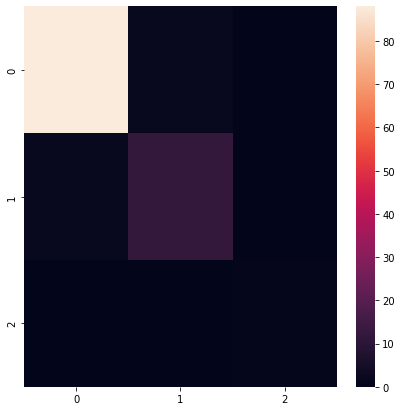

In [43]:
from sklearn.linear_model import LogisticRegression
#The same procedure as before is run. This time it is for Agglomerative clustering.
model = LogisticRegression()
Y = secondForest['Clusters']
X = secondForest.drop(columns = 'Clusters')
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.20, random_state = 1)
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print(' --------- \n')
plt.figure(figsize=(7,7))
sb.heatmap(confusion_matrix(testY, predictedOutput))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.86      0.86      0.86        14
           2       1.00      1.00      1.00         1

    accuracy                           0.96       105
   macro avg       0.94      0.94      0.94       105
weighted avg       0.96      0.96      0.96       105

The mean absolute error is 0.0380952380952381
Accuracy score:  0.9619047619047619
 --------- 



<AxesSubplot:>

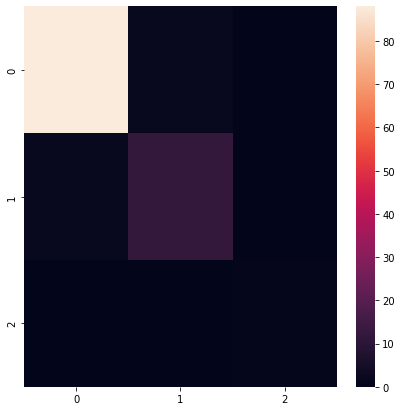

In [44]:
from sklearn.linear_model import LogisticRegression
#The same procedure as before is run. This time it is for DBSCAN.
model = LogisticRegression()
Y = thirdForest['Clusters']
X = thirdForest.drop(columns = 'Clusters')
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.20, random_state = 1)
model.fit(trainX, trainY)
predictedOutput = model.predict(testX)
print(classification_report(testY, predictedOutput))
print('The mean absolute error is', mean_absolute_error(testY, predictedOutput))
print('Accuracy score: ',accuracy_score(testY, predictedOutput))
print(' --------- \n')
plt.figure(figsize=(7,7))
sb.heatmap(confusion_matrix(testY, predictedOutput))


## Prediction and plot interpretation

    As the results come in, it is clear that predictions are not reliable when done on modified, clustered database; all of the classifier reports, accuracy scores and MAE are the same. Logistic regression is the best classifier; all other studied classifiers have been tested and give null results. Nevertheless, they demonstrate more than 96% accuracy on average, which is a good result. The ocnfusion matrices are misleading. The reason why all of the cells on the diagonal are dark, except for the first one, is that the first cluster is usually the most populated, with a clear difference in shear numbers.

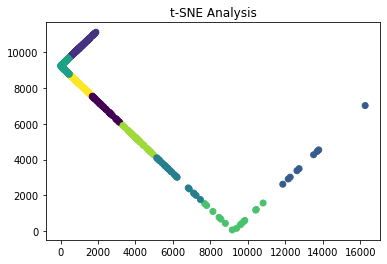

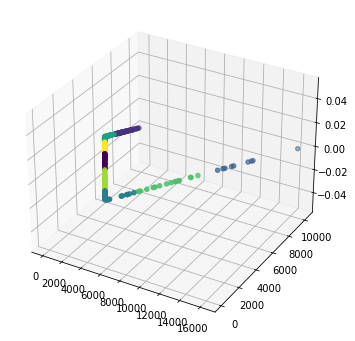

In [45]:
from sklearn.manifold import TSNE

#new_X is the KMeans-like version of the database, and will serve as the base dataframe for t-SNE.
X_embedded = KMeans()
new_X = X_embedded.fit_transform(df)
#The predicted outputs are taken from the KMeans library, being scattered afterwards.
y_pred = KMeans().fit_predict(new_X)
plt.scatter(new_X[:, 0], new_X[:, 1], c=y_pred)
plt.title("t-SNE Analysis")
plt.show()
#Plotting procedures.
fig = plt.figure(figsize=(10,6))
axys = fig.add_subplot(111, projection='3d')
axys.scatter(new_X[:,0], new_X[:,2], c = y_pred)



# AN EXPERIMENT

    The t-SNE algorithm for dimensionality reduction is run on the database, which is then subjected to KMeans clustering. KMeans is the most reliable one when it comes to multiple iteration. All of the other classifiers change the shape of the data dramatically when ran multiple times, while KMeans maintains the semirectangle shape constantly. It divides the database into 6 different clusters, following a line pattern.

# CONCLUSIONS

    To derive the conclusions, the 6 cluster diagrams will mostly be used, as they give the best customer segmentation representations.

## The algorithms

    KMeans appears to be the one who did the best, as it grouped the customers in the fairest way, correctly identifying the outliers and dividing all datapoints mainly on Credit amount, in a fair way. Meanshift did good as well, coming in close second; the slight slant posed on the graph gave another, interesting view on how to group the customers. Affinity propagation and Agglomerative clustering are relatively similar in results, although AP seems to be more 'messy'.

    DBSCAN has been a personal favourite of the researcher; it did exactly what it was told to do: group together the outliers, which it did perfectly and coincesly. 

## So how can these customers be grouped?

    The customers can be grouped in 3 main categories, with 4 subcategories, 2 for the first and last:

### The reliable and responsible

    They represent the generic first three clusters; if the KMeans plots are taken into account, they are people who:

    -) Take the lowest credits.
    -) Give them back in the quickest time.
    -) Usually own their own house, or live freely
    -) Usually use the money for their car, or their Radio/TV.

    The 2 subcategories for this group are:

* The youngsters: they are young (lowest mean age), live freely (no rent, or they do not own) and usually use their money for their car; they are either low-level or mid-low-level checking and savings account, and do not have the highest paying jobs.

* The responsible adults: they live on their own, split their credits between their business and car and have fairly stable jobs. They usually give the money back on time.

### The cluster centers

    They are a mix between the two categories, as they are right in the center. They're characteristics are not very well defined, but some conclusions can be drawn out:

    -) They don't have a defined age, theirs is the average.
    -) They take their time giving back the credits; not the longest, but some outliers increase the mean.
    -) They use their credits for education more than anybody else.
    -) Their average job level is not bad.

    They can be called 'the graduates', as these students are most likely following a graduate program (education in Europe is mostly free, with Germany being one of the leading nations in such a department). Undergrads are usually free, while graduate level studies usually aren't. In addition, most of these customers have good paying jobs, are living in rented housing and most of their accounts are mid-level.

### The big spenders

    The big spenders are comprised of the last two clusters; they are people who take out BIG SUMS and give them back after a long time. Their main characteristics are:
    -) They are usually older customers.
    -) Who spend the credits not just on their car or furniture (like other groups), but also on repairs, their business (bigger average than the responsible adults) and, surprisingly, vacations. 
    -) Their jobs have the best average, along with their checking and saving accounts.
    -) They have the outliers.

    They can be classified in the subsequent manners:

* The successful: they mostly own their housing, they have on average the best jobs and best savings/checking account; they have the highest rate of business-related spending and can sometimes take less than 10 weeks to pay back their loan. 
* The outliers: only a few datapoints, they take the largest sums of money and give it back in the longest time. Usually have good jobs, and sometimes live on rent. Not very good customers.
    

# ON WHAT HORSE SHOULD THE BANKS BET ON?

    The 'successful' is a cluster of people with a decent enough cardinality. They are the ones that, taking out the outliers, take the biggest credit amounts and sometimes give them back in the shortest time. The data shows they are old enough to be mature, have very good and stable jobs, which is also proved by their bank accounts and primarily own their housing. If good enough marketing is done to this group, and better deals and incentives are given, it could potentially lower their 'Duration' average. This would make the banks' offers more appealing to this class of customers, rendering the cluster more populated and guaranteeing financial success on the institution's side.